### Mortality and Readmission Outcomes of a Heart Failure Cohort

#### Part 2:  Univariate Analyses

#### Data Source: Physionet: Hospitalized Patients with Heart Failure (Zhang et al., 2020)

### Outline
I.  Data Loading 
    
II.  Univariate Analyses

    A.  Custom Codes
    B.  Analyses 
    C.  Summary of Findings

#### I. Data Loading

In [386]:
# HF EHR and outcome
import pandas as pd
pd.options.display.max_columns = 170
pd.options.display.max_colwidth = 100
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat

In [387]:
# loading de-identified data, prepared in Part 1
hf = pd.read_csv('hf.csv', header=0)
hf.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

In [388]:
hf.head()

,age,gender,occupation,visit.times,admission.way,HR,RR,SBP,DBP,MAP,temp,Wt,Ht,BMI,consciousness,GCS,GCS.E,GCS.V,GCS.M,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,CTD,PUD,liver.disease,dementia,hemiplegia,leukemia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,WBC,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,fibrinogen,CK,CK.enz,CK.enz.CK,GFR,crea,urea,uric.acid,cystatin,CO2.BC,Na,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,BNP,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,discharge,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
0,"(69,79]",Male,UrbanResident,1,NonEmergency,87,19,102,64,76.666667,36.7,50,1,18,Clear,15,4,5,6,0,Both,3,0,3,1,0,0,0,0,1,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,52,9.43,0.80,0.085,7.05,0.746,1.51,0.05,0.006,0.02,0.002,4.09,131,0.387,15.0,50.3,94,32.0,338,102,14.0,16.6,0.142,1.39,33,17.0,60,1.37,1.19,3.84,43,9.6,0.22,58,108,12.55,685,1.32,21.6,134,5.59,101,2.28,0.630000,185,65,294,1500,3.5,20.5,38,23.8,1.6,83,81.0,6.9,11.4,18.3,61,4.9,61,3.46,1.90,0.84,2.69,Alive,11,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
1,"(69,79]",Female,UrbanResident,1,NonEmergency,95,18,150,70,96.666667,36.8,51,1,19,Clear,15,4,5,6,0,Both,3,0,1,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,0,40,5.32,0.35,0.066,3.73,0.702,1.18,0.01,0.002,0.05,0.009,3.93,114,0.349,13.0,40.7,88,28.9,326,123,11.3,16.1,0.139,1.16,35,18.4,65,1.18,1.06,2.62,107,17.2,0.16,85,62,4.29,170,1.25,26.5,144,3.62,105,2.28,0.840000,170,19,203,361,2.2,21.9,40,25.4,1.6,17,21.0,5.2,13.1,18.3,69,2.4,66,3.15,1.26,1.30,0.84,Alive,8,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
2,"(59,69]",Male,farmer,2,NonEmergency,98,18,102,67,78.666667,36.5,70,1,24,Clear,15,4,5,6,0,Both,2,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,0,46,13.01,0.67,0.051,11.54,0.887,0.75,0.03,0.002,0.02,0.002,4.43,144,0.427,12.9,44.5,96,32.6,339,169,12.0,16.5,0.203,1.10,36,14.9,85,1.09,0.83,5.74,38,14.6,0.38,31,185,15.99,567,2.43,21.6,142,4.15,107,2.56,0.770000,105,10,137,293,2.3,12.3,33,27.7,1.2,27,9.0,4.4,7.5,11.9,76,2.4,60,3.79,2.13,0.94,1.53,Alive,5,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
3,"(69,79]",Male,UrbanResident,1,Emergency,73,19,110,74,86.000000,36.0,65,1,22,Clear,15,4,5,6,0,Both,3,0,2,0,0,0,1,0,1,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,52,2.18,0.19,0.087,1.22,0.559,0.71,0.00,0.000,0.06,0.028,2.71,94,0.277,18.8,69.0,102,34.7,339,35,12.4,19.4,0.032,1.37,38,18.3,60,1.36,1.39,2.63,89,15.8,0.17,58,104,8.16,635,2.32,21.1,136,3.76,101,2.35,0.817057,183,9,225,1071,11.2,19.4,40,27.0,1.5,134,25.0,25.4,26.2,51.6,191,9.4,67,2.92,1.31,0.98,0.92,Alive,11,Home,0,0,0,NaN,1,1,1,19.0,1.0,19.0
4,"(69,79]",Female,UrbanResident,1,NonEmergency,88,19,134,62,86.000000,35.0,76,1,31,Clear,15,4,5,6,0,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,0,64,6.14,0.53,0.086,4.28,0.697,1.27,0.01,0.002,0.05,0.008,4.20,120,0.378,14.7,47.7,90,28.6,317,104,12.6,16.4,0.131,1.19,34,16.4,74,1.19,0.57,3.50,122,13.6,0.11,60,83,6.86,432,1.35,22.8,136,3.94,104,2.42,0.920000,270,19,295,372,2.9,12.3,42,29.6,1.4,17,30.0,4.9,6.9,11.8,61,3.3,71,2.68,1.21,0.91,0.62,Alive,5,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN


#### II.  A.  Univariate Analyses:  Custom Codes

In [389]:
def aggregate2(var):
    display(hf[var].agg(['mean','median',stat.mode,'min','max','std']))

In [390]:
def table(var, Varname):
    val = hf[var].value_counts().sort_index()
    perc = val/ 2008 * 100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname,'Distribution among Heart Failure cohort')
    display(feature)

In [391]:
def table_barplot1(var, Varname, label_x):
    val = hf[var].value_counts().sort_index()
    perc = val/ 2008 * 100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname,'Distribution among Heart Failure cohort')
    display(feature)
    val.plot(kind = 'bar', rot=20, figsize = (13,4), fontsize =11, cmap='summer')
    plt.xlabel(label_x, size =14)
    plt.ylabel('Frequency', size =14)
    plt.grid(color = 'black', alpha = 0.2);

In [392]:
def table_barplot2(var, Varname, label_x):
    val = hf[var].value_counts().sort_index()
    perc = val/ 2008 * 100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname,'Distribution among Heart Failure cohort')
    display(feature)
    val.plot(kind = 'bar', rot=0, figsize = (5,4), fontsize =10, cmap='PuOr')
    plt.xlabel(label_x, size =14)
    plt.ylabel('Frequency', size =14)
    plt.grid(color = 'black', alpha = 0.2);

In [393]:
def table_pieplot2(var, Varname, label_0, label_1):
    val = hf[var].value_counts().sort_index()
    perc = val/2008 *100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname, 'Distribution among Heart Failure cohort')
    display(feature)
    val.plot(kind = 'pie', figsize = (3,3), colormap = 'Paired', explode = (0.2,0),
             labels = perc.round(2), shadow = True, startangle=90)
    plt.legend(labels = (label_0, label_1), bbox_to_anchor = (0.9,1), fontsize = 11)

In [394]:
def table_pieplot3(var, Varname, label_a, label_b, label_c ):
    val = hf[var].value_counts().sort_index()
    perc = val/2008 *100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname, 'Distribution among Heart Failure cohort')
    display(feature)
    val.plot(kind = 'pie', colormap = 'Spectral', explode = [0.2, 0.3,0],
             labels = perc.round(2), shadow = True, startangle=90, figsize = (3.2,3.2))
    plt.legend(labels = (label_a, label_b, label_c),
               bbox_to_anchor = (1.1,1), fontsize = 11)

In [395]:
def table_piesubplot2(var1, var2, varname1, varname2):
    print('Distribution of '+ varname1+ ' and ' + varname2 + ' among HF cohort')
    value1 = hf[var1].value_counts().sort_index()
    value1.rename({0: ('No '+ var1), 1: ('With '+ var1)}, axis = 0, inplace=True)
    percent1 = (value1/ 2008) *100
    table1 = pd.concat([value1, percent1], axis = 1, keys = ['Frequency','%']).round(2)
    value2 = hf[var2].value_counts().sort_index()
    value2.rename({0: ('No '+ var2), 1: ('With '+ var2)}, axis = 0, inplace=True)
    percent2 = (value2/2008) *100
    table2 = pd.concat([value2, percent2], axis = 1, keys = ['Frequency','%']).round(2)
    table = pd.concat([table1, table2], axis =0)
    display(table)
    plt.figure()
    plt.subplot2grid((1,2), (0,0))
    plt.pie(value1, explode = (0.15,0), labels = percent1.round(2), shadow = True, startangle=90)
    plt.title(varname1)
    plt.legend(labels = ( ('No '+ var1) , var1), bbox_to_anchor =(1,0), fontsize=11)
    plt.subplot2grid((1,2), (0,1))
    plt.pie(value2, explode = (0.15,0), labels = percent2.round(2), shadow = True, startangle=90)
    plt.title(varname2)
    plt.legend(labels = ( ('No '+ var2) , var2), bbox_to_anchor =(1,0), fontsize=11)


In [396]:
def table_alive(var, Varname):
    val = hf_alive[var].value_counts().sort_index()
    perc = val/ 1890 * 100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname,'Distribution among Heart Failure cohort')
    display(feature)

In [397]:
def table_alive2(var, title):
    val = hf[var].value_counts().sort_index()
    perc = val/ 2008 * 100
    val2 = hf_alive[var].value_counts().sort_index()
    perc2 = (val2/1890) *100
    feature = pd.concat( [perc, perc2], axis = 1, keys = ['% among whole cohort','% among Alive at discharge']).round(2)
    print(title,'Distribution among Heart Failure cohort')
    display(feature)

In [398]:
def impute_mean(var):
    hf[var].fillna(hf.groupby('NYHA')[var].transform('mean'), inplace=True)
    print(var, 'null value= ', hf[var].isnull().sum())

#### II.  B.  Univariate Analyses

Age range Distribution among Heart Failure cohort


,Frequency,%
"(21,29]",4,0.20
"(29,39]",12,0.60
"(39,49]",56,2.79
"(49,59]",106,5.28
"(59,69]",368,18.33
"(69,79]",715,35.61
"(79,89]",646,32.17
"(89,110]",101,5.03


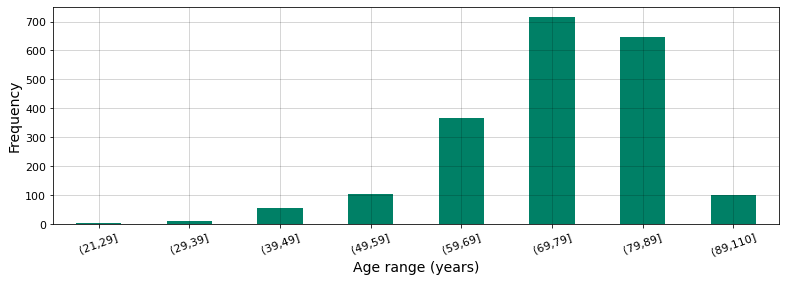

In [399]:
table_barplot1('age','Age range','Age range (years)')

Findings:
- mean age could not be computed
- majority of the patients are between ages 69-89 (67%)
- a small minority (4%) were aged less than 50 years

Gender Distribution among Heart Failure cohort


,Frequency,%
Female,1163,57.92
Male,845,42.08


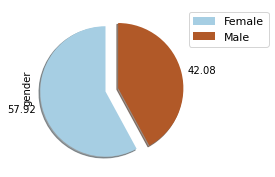

In [400]:
table_pieplot2('gender','Gender','Female','Male')

Findings:
- Slightly more than half of the patients (58%) were female

In [401]:
hf['occupation'].value_counts()

UrbanResident    1697
farmer            198
Others             89
worker             17
Officer             7
Name: occupation, dtype: int64

Findings;
- Occupation variable does not provide adequately detailed information  -- > remove column

In [402]:
hf.drop(['occupation'], axis=1, inplace=True)

Number of prior hospitalizations Distribution among Heart Failure cohort


,Frequency,%
1,1860,92.63
2,120,5.98
3,20,1.00
4,6,0.30
5,2,0.10


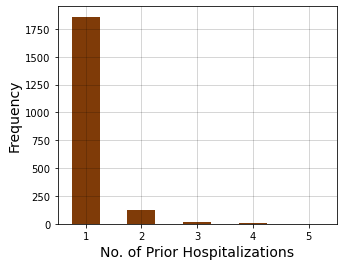

In [403]:
table_barplot2('visit.times', 'Number of prior hospitalizations', 'No. of Prior Hospitalizations')

Findings:
- All of the patients has at least had one previous hospital admission
- Most of the patients (93%) has been admitted once before
- A small minority (1.5%) has been admitted 3-5x prior

Urgency of Admission Distribution among Heart Failure cohort


,Frequency,%
Emergency,956,47.61
NonEmergency,1052,52.39


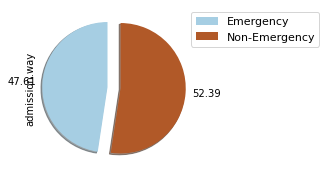

In [404]:
table_pieplot2('admission.way','Urgency of Admission','Emergency','Non-Emergency')

Findings:
- Almost half of the patients (48%) needed emergent care during present hospital admission

In [405]:
aggregate2('HR')

mean       85.235060
median     82.000000
mode       80.000000
min         0.000000
max       198.000000
std        21.539214
Name: HR, dtype: float64

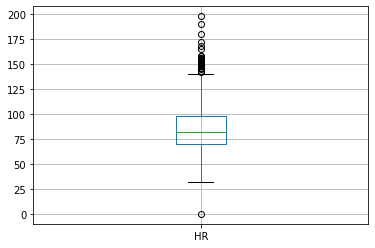

In [406]:
hf.boxplot('HR');

In [407]:
HR_labels = ['0-25','26-50','50-75','76-100','101-125','126-150','>150']
HR_bins = [0,25,50,75,100,125,150,200]
loc = (hf.columns.get_loc('HR'))+1
hf.insert(loc=loc, column = 'HR_group', value = (pd.cut(hf['HR'], bins = HR_bins, labels = HR_labels, include_lowest = True)))

Heart Rate (beats/minute) Distribution among Heart Failure cohort


,Frequency,%
0-25,1,0.05
26-50,61,3.04
50-75,626,31.18
76-100,903,44.97
101-125,331,16.48
126-150,69,3.44
>150,17,0.85


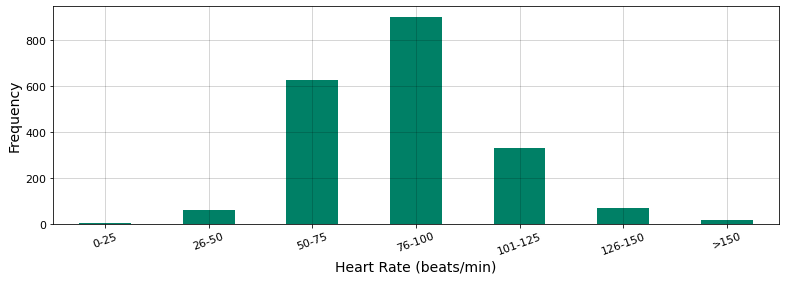

In [408]:
table_barplot1('HR_group','Heart Rate (beats/minute)','Heart Rate (beats/min)')

Findings:
- The mean HR was normal at 85 +/- 22 bpm (range 0-198)
- Majority of the patients (75%) had a normal HR range (50-100 bpm)
- A minority (3%) were bradhycardic with HR 25-50 bpm
- A minority (4%) were tachycardic with HR >125 bpm

In [409]:
aggregate2('RR')

mean      19.085657
median    19.000000
mode      18.000000
min        0.000000
max       36.000000
std        1.737546
Name: RR, dtype: float64

In [410]:
RR_labels = ['0-5', '6-10','11-15','16-20','21-25','26-30','>30']
RR_bins = [0,5,10,15,20,25,30,40]
loc = (hf.columns.get_loc('RR')) + 1
hf.insert(loc=loc, column = 'RR_group', 
          value = (pd.cut(hf['RR'], bins = RR_bins, labels = RR_labels, include_lowest=True)))

Respiratory Rate (breaths/minute) Distribution among Heart Failure cohort


,Frequency,%
0-5,1,0.05
6-10,0,0.00
11-15,3,0.15
16-20,1764,87.85
21-25,220,10.96
26-30,15,0.75
>30,5,0.25


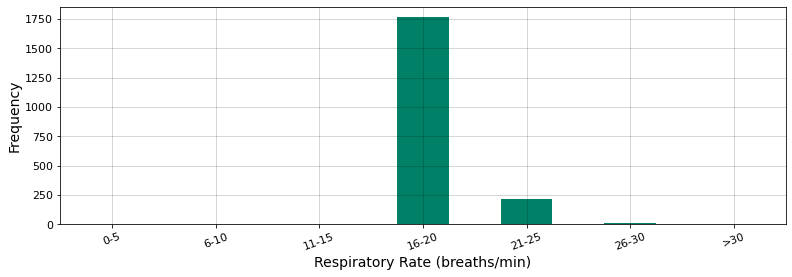

In [411]:
table_barplot1('RR_group','Respiratory Rate (breaths/minute)','Respiratory Rate (breaths/min)')

Findings:
- The mean RR was high-normal at 19 +/- 2 (range 0-36 bpm)
- Majority of the patients (87%) had normal RR (15-20 bpm)
- One came in not breathing
- A small minority (0.3%) were very tachypneic (>30 bpm)

In [412]:
aggregate2('SBP')

mean      131.056773
median    130.000000
mode      120.000000
min         0.000000
max       252.000000
std        24.741670
Name: SBP, dtype: float64

In [413]:
SBP_labels = ['0 - 50', '51 - 70','71 - 90','91 - 110','111 - 130','131 - 150','151 - 170','>170']
SBP_bins = [0,50,70,90,110,130,150,170,260]
loc = (hf.columns.get_loc('SBP')) + 1
hf.insert(loc=loc, column = 'SBP_group', 
          value = (pd.cut(hf['SBP'], bins = SBP_bins, labels = SBP_labels, include_lowest=True)))

Systolic BP (mmHg) Distribution among Heart Failure cohort


,Frequency,%
0 - 50,4,0.20
51 - 70,1,0.05
71 - 90,67,3.34
91 - 110,396,19.72
111 - 130,632,31.47
131 - 150,534,26.59
151 - 170,257,12.80
>170,117,5.83


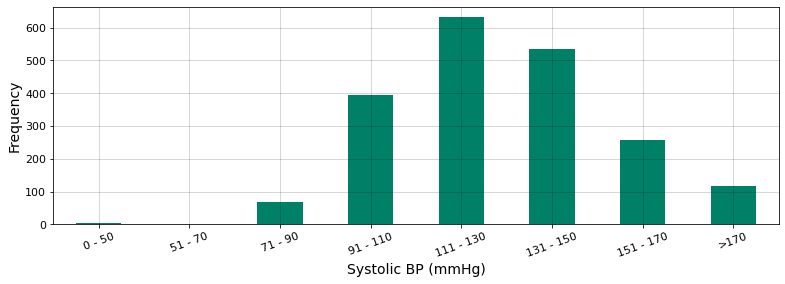

In [414]:
table_barplot1('SBP_group','Systolic BP (mmHg)', 'Systolic BP (mmHg)')

Findings:
- The mean SBP was high-normal at 131 +/- 24 (range 0-252 mmHg)
- Half of the patients had normal SBP at 90-130 mmHg
- A minority (3.5%) came in hypotensive, with one having no pressure
- Almost half (45%) were hypertensive, with 6% having SBP of more than 170 mmHg

In [415]:
aggregate2('DBP')

mean       76.573207
median     76.000000
mode       80.000000
min         0.000000
max       146.000000
std        14.461247
Name: DBP, dtype: float64

In [416]:
DBP_labels = ['0-50', '51-70','71-90','91-110','111-130','>130']
DBP_bins = [0,50,70,90,110,130,150]
loc = (hf.columns.get_loc('DBP')) + 1
hf.insert(loc=loc, column = 'DBP_group', 
          value = (pd.cut(hf['DBP'], bins =DBP_bins, labels =DBP_labels, include_lowest=True)))

Diastolic BP (mmHg) Distribution among Heart Failure cohort


,Frequency,%
0-50,39,1.94
51-70,788,39.24
71-90,904,45.02
91-110,248,12.35
111-130,28,1.39
>130,1,0.05


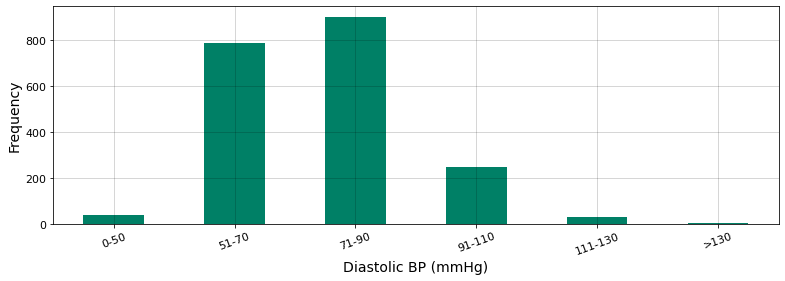

In [417]:
table_barplot1('DBP_group','Diastolic BP (mmHg)', 'Diastolic BP (mmHg)')

Findings:
- The mean DBP was normal at 74 +/- 14 (range 0-146 mmHg)
- Almost half (45%) of the patients had normal diastolic BP of 70-90 mmJg
- A good proportion (39%) had low diastolic pressures of 50-70 mmHg

In [418]:
aggregate2('MAP')

mean       94.734396
median     93.333333
mode       96.666667
min         0.000000
max       181.333333
std        16.323762
Name: MAP, dtype: float64

In [419]:
MAP_labels = ['0-50', '51-70','71-90','91-110','111-130','>130']
MAP_bins = [0,50,70,90,110,130,150]
loc = (hf.columns.get_loc('MAP')) + 1
hf.insert(loc=loc, column = 'MAP_group',
          value= (pd.cut(hf['MAP'], bins = MAP_bins, labels =MAP_labels, include_lowest =True)))

Mean Arterial Pressure Distribution among Heart Failure cohort


,Frequency,%
0-50,5,0.25
51-70,80,3.98
71-90,775,38.60
91-110,829,41.28
111-130,274,13.65
>130,43,2.14


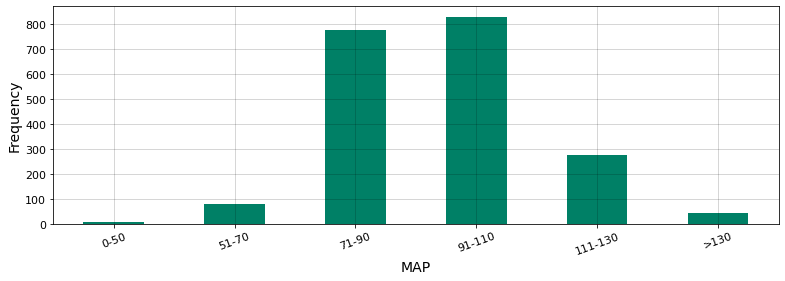

In [420]:
table_barplot1('MAP_group','Mean Arterial Pressure', 'MAP')

Findings:
- The mean MAP was high normal at 95 +/- 16 (range 0-181 mmHg)
- More than a third (39%) had a normal MAP of 71-90 
- There was a tendency towards higher MAP values, compared to the lower values

In [421]:
aggregate2('temp')

mean      36.416484
median    36.300000
mode      36.500000
min       35.000000
max       42.000000
std        0.439529
Name: temp, dtype: float64

In [422]:
temp_labels = ['35.0 - 36.0', '36.1 - 37.0','37.1 - 38.0','38.1 - 39.0','>39.0']
temp_bins = [35,36,37,38,39,42]
loc = (hf.columns.get_loc('temp')) + 1
hf.insert(loc=loc, column = 'temp_group',
          value= (pd.cut(hf['temp'], bins =temp_bins, labels = temp_labels, include_lowest =True)))

Temperature (C) Distribution among Heart Failure cohort


,Frequency,%
35.0 - 36.0,347,17.28
36.1 - 37.0,1557,77.54
37.1 - 38.0,81,4.03
38.1 - 39.0,21,1.05
>39.0,2,0.10


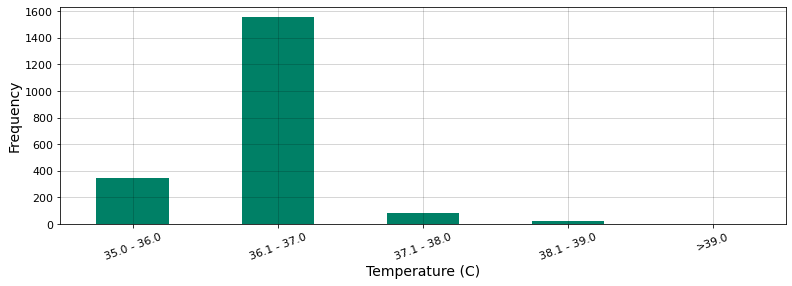

In [423]:
table_barplot1('temp_group','Temperature (C)','Temperature (C)')

Findings:
- The mean temp was low-normal at 36.4 +/- 0.4 (range 35-42 C)
- Majority (78%) had low-normal temperatures at 36.1-37 C

In [424]:
aggregate2('Wt')

mean       52.446713
median     50.000000
mode       60.000000
min         0.000000
max       115.000000
std        10.906503
Name: Wt, dtype: float64

In [425]:
hf [hf['Wt'] <=30]
# will accept wt of 30 for 6 values, in view of generally smaller physique in Asians

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Ht,BMI,consciousness,GCS,GCS.E,GCS.V,GCS.M,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,CTD,PUD,liver.disease,dementia,hemiplegia,leukemia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,WBC,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,fibrinogen,CK,CK.enz,CK.enz.CK,GFR,crea,urea,uric.acid,cystatin,CO2.BC,Na,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,BNP,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,discharge,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
39,"(79,89]",Female,1,Emergency,102,101-125,22,21-25,160,151 - 170,90,71-90,113.333333,111-130,36.1,36.1 - 37.0,30,1,13,Clear,15,4,5,6,0,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,0,52,11.39,0.81,0.071,10.16,0.892,0.38,0.03,0.003,0.01,0.001,4.36,133,0.407,17.2,57.9,93,30.6,328,141,11.800000,16.400000,0.167000,1.17,30,16.1,76,1.17,4.43,3.63,250,21.1,0.080000,47,92,12.25,422,1.74,21.7,137,4.43,103,2.30,0.850000,256,15,302,445,2.9,18.200000,38,21.3,1.8,36,31.0,4.2,7.6,11.8,53,2.7,59,4.05,1.39,2.09,0.74,Alive,4,Unknown,0,0,0,NaN,0,0,0,NaN,0.0,NaN
378,"(79,89]",Female,1,NonEmergency,96,76-100,19,16-20,130,111 - 130,80,71-90,96.666667,91-110,38.6,38.1 - 39.0,0,1,0,Clear,15,4,5,6,1,Both,3,1,1,0,0,0,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,3,61,12.55,0.47,0.037,11.69,0.931,0.35,0.02,0.002,0.02,0.002,5.46,149,0.458,18.5,52.5,83,27.3,325,190,13.700000,20.200000,0.264000,1.13,28,16.1,70,1.14,4.92,3.22,89,15.8,0.170000,50,89,10.27,499,1.70,21.9,139,3.81,100,2.18,0.817057,183,29,225,2821,4.8,25.400000,32,29.6,1.1,83,25.0,11.1,19.9,31.0,118,3.8,62,4.47,2.73,0.93,1.19,Alive,10,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
387,"(59,69]",Male,1,Emergency,104,101-125,19,16-20,110,91 - 110,68,51-70,82.000000,71-90,36.6,36.1 - 37.0,0,1,0,Clear,15,4,5,6,1,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,1,65,12.10,0.80,0.066,8.26,0.683,2.65,0.08,0.007,0.31,0.025,3.86,122,0.360,14.9,49.9,93,31.7,339,184,14.100000,16.200000,0.259000,1.20,40,17.6,73,1.21,0.84,3.63,97,17.5,0.180000,59,110,9.51,572,2.04,21.3,140,3.77,106,2.37,0.760000,176,30,231,1498,3.6,26.500000,38,29.9,1.3,57,27.0,6.5,15.4,21.9,81,8.5,68,3.79,1.80,0.86,2.55,Alive,7,Home,0,0,0,NaN,0,0,0,206.0,0.0,206.0
465,"(69,79]",Female,1,NonEmergency,77,76-100,26,26-30,149,131 - 150,54,51-70,85.666667,71-90,36.5,36.1 - 37.0,0,1,0,Clear,15,4,5,6,1,Both,3,0,3,1,0,0,0,0,0,TypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,55,10.02,0.36,0.036,7.22,0.721,2.42,0.01,0.001,0.01,0.001,3.69,120,0.375,14.0,50.7,101,32.5,320,56,17.600000,16.000000,0.099000,1.18,33,19.4,76,1.17,2.98,2.56,156,30.4,0.190000,63,80,5.83,343,1.65,16.9,138,4.55,104,2.01,0.900000,250,26,279,1140,5.1,17.200000,37,24.7,1.5,76,50.0,4.9,8.9,13.8,88,15.9,62,3.92,1.40,1.80,0.94,Alive,14,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
536,"(69,79]",Female,1,NonEmergency,94,76-100,20,16-20,140,131 - 150,90,71-90,106.666667,91-110,36.3,36.1 - 37.0,8,1,3,Clear,15,4,5,6,1,Both,4,0,2,1,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,49,10.51,0.47,0.045,8.71,0.829,1.29,0.03,0.003,0.01,0.001,3.95,115,0.357,13.1,41.8,90,29.2,323,234,12.600000,16.000000,0.295000,1.16,26,18.1,66,1.17,1.01,3.22,140,16.0,0.110000,56,84,5.03,326,1.50,21.3,138,2.94,98,2.16,0.740000,231,76,312,1578,8.7,18.800000,36,30.6,1.2,131,47.0,10.4,15.7,26.1,86,25.0,67,4.84,2.39,1.24,1.44,Alive,11,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
663,"(89,110]",Female,1,Emergency,120,101-125,19,16-20,157,151 - 170,107,91-110,123.666667,111-130,36.8,36.1 - 37.0,30,1,14,Clear,15,4,5,6,1,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,1

In [426]:
# replace Wt 0 and 8 with mode 60
hf['Wt'] = hf['Wt'].replace({0:60, 8:60})

In [427]:
aggregate2('Wt')

mean       52.562251
median     50.000000
mode       60.000000
min        30.000000
max       115.000000
std        10.675030
Name: Wt, dtype: float64

In [428]:
var= hf['Wt']
labels = ['<=50','51-60','61-70','71-80','81-90','>90']
bins = [0,50,60,70,80,90,115]
loc = (hf.columns.get_loc('Wt')) +1
newcolumn = 'Wt_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Weight (kg) Distribution among Heart Failure cohort


,Frequency,%
<=50,1099,54.73
51-60,544,27.09
61-70,249,12.40
71-80,85,4.23
81-90,26,1.29
>90,5,0.25


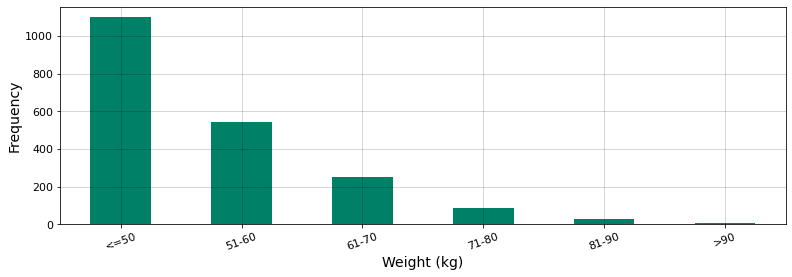

In [429]:
table_barplot1('Wt_group','Weight (kg)', 'Weight (kg)')

Findings:
- The mean weight was 53 +/- 11 (range 30 -115 kg)
- More than half of the patients (55%) weighed less than or equal to 50kg

In [430]:
aggregate2('Ht')

mean      0.998008
median    1.000000
mode      1.000000
min       0.000000
max       1.000000
std       0.044599
Name: Ht, dtype: float64

In [431]:
hf['Ht'].value_counts()

1    2004
0       4
Name: Ht, dtype: int64

In [432]:
# height data non-contributory --> drop
hf.drop(['Ht'], axis = 1, inplace=True)

In [433]:
aggregate2('BMI')

mean       21.315737
median     20.000000
mode       19.000000
min         0.000000
max       404.000000
std        13.660884
Name: BMI, dtype: float64

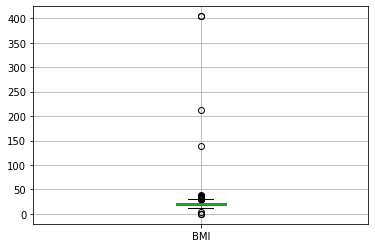

In [434]:
hf.boxplot('BMI');

In [435]:
hf [ hf['BMI'] <=10]

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,consciousness,GCS,GCS.E,GCS.V,GCS.M,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,CTD,PUD,liver.disease,dementia,hemiplegia,leukemia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,WBC,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,fibrinogen,CK,CK.enz,CK.enz.CK,GFR,crea,urea,uric.acid,cystatin,CO2.BC,Na,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,BNP,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,discharge,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
378,"(79,89]",Female,1,NonEmergency,96,76-100,19,16-20,130,111 - 130,80,71-90,96.666667,91-110,38.6,38.1 - 39.0,60,51-60,0,Clear,15,4,5,6,1,Both,3,1,1,0,0,0,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,3,61,12.55,0.47,0.037,11.69,0.931,0.35,0.02,0.002,0.02,0.002,5.46,149,0.458,18.5,52.5,83,27.3,325,190,13.7,20.2,0.264,1.13,28,16.1,70,1.14,4.92,3.22,89,15.8,0.17,50,89,10.27,499,1.70,21.9,139,3.81,100,2.18,0.817057,183,29,225,2821,4.8,25.4,32,29.6,1.1,83,25.0,11.1,19.9,31.0,118,3.8,62,4.47,2.73,0.93,1.19,Alive,10,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
387,"(59,69]",Male,1,Emergency,104,101-125,19,16-20,110,91 - 110,68,51-70,82.000000,71-90,36.6,36.1 - 37.0,60,51-60,0,Clear,15,4,5,6,1,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,1,65,12.10,0.80,0.066,8.26,0.683,2.65,0.08,0.007,0.31,0.025,3.86,122,0.360,14.9,49.9,93,31.7,339,184,14.1,16.2,0.259,1.20,40,17.6,73,1.21,0.84,3.63,97,17.5,0.18,59,110,9.51,572,2.04,21.3,140,3.77,106,2.37,0.760000,176,30,231,1498,3.6,26.5,38,29.9,1.3,57,27.0,6.5,15.4,21.9,81,8.5,68,3.79,1.80,0.86,2.55,Alive,7,Home,0,0,0,NaN,0,0,0,206.0,0.0,206.0
465,"(69,79]",Female,1,NonEmergency,77,76-100,26,26-30,149,131 - 150,54,51-70,85.666667,71-90,36.5,36.1 - 37.0,60,51-60,0,Clear,15,4,5,6,1,Both,3,0,3,1,0,0,0,0,0,TypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,55,10.02,0.36,0.036,7.22,0.721,2.42,0.01,0.001,0.01,0.001,3.69,120,0.375,14.0,50.7,101,32.5,320,56,17.6,16.0,0.099,1.18,33,19.4,76,1.17,2.98,2.56,156,30.4,0.19,63,80,5.83,343,1.65,16.9,138,4.55,104,2.01,0.900000,250,26,279,1140,5.1,17.2,37,24.7,1.5,76,50.0,4.9,8.9,13.8,88,15.9,62,3.92,1.40,1.80,0.94,Alive,14,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
536,"(69,79]",Female,1,NonEmergency,94,76-100,20,16-20,140,131 - 150,90,71-90,106.666667,91-110,36.3,36.1 - 37.0,60,51-60,3,Clear,15,4,5,6,1,Both,4,0,2,1,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,49,10.51,0.47,0.045,8.71,0.829,1.29,0.03,0.003,0.01,0.001,3.95,115,0.357,13.1,41.8,90,29.2,323,234,12.6,16.0,0.295,1.16,26,18.1,66,1.17,1.01,3.22,140,16.0,0.11,56,84,5.03,326,1.50,21.3,138,2.94,98,2.16,0.740000,231,76,312,1578,8.7,18.8,36,30.6,1.2,131,47.0,10.4,15.7,26.1,86,25.0,67,4.84,2.39,1.24,1.44,Alive,11,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN


In [436]:
hf [ hf['BMI'] >=50]

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,consciousness,GCS,GCS.E,GCS.V,GCS.M,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,CTD,PUD,liver.disease,dementia,hemiplegia,leukemia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,WBC,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,fibrinogen,CK,CK.enz,CK.enz.CK,GFR,crea,urea,uric.acid,cystatin,CO2.BC,Na,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,BNP,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,discharge,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
316,"(69,79]",Female,2,NonEmergency,66,50-75,18,16-20,110,91 - 110,62,51-70,78.000000,71-90,36.5,36.1 - 37.0,49,<=50,212,Clear,15,4,5,6,1,Both,3,0,1,0,0,1,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,3,44,9.43,0.54,0.057,8.48,0.899,0.38,0.03,0.003,0.00,0.000,2.52,77,0.245,13.1,45.3,96,30.3,313,165,10.8,16.0,0.179,1.42,41,14.2,57,1.42,2.64,7.20,46,10.8,0.23,9,365,22.72,491,4.17,13.5,138,4.95,108,2.61,0.850000,147,23,173,1038,2.1,6.800000,34,40.6,0.9,32,20.0,4.3,8.6,12.9,92,7.3,75,4.40,2.17,1.33,1.19,Alive,8,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
319,"(49,59]",Male,1,NonEmergency,80,76-100,19,16-20,120,111 - 130,62,51-70,81.333333,71-90,36.1,36.1 - 37.0,49,<=50,404,Clear,15,4,5,6,1,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,1,73,7.21,0.42,0.058,5.42,0.751,1.22,0.03,0.004,0.12,0.017,4.26,133,0.393,13.7,45.6,92,31.1,338,218,12.1,16.3,0.265,1.18,28,15.8,75,1.18,1.71,2.78,76,16.6,0.22,97,79,6.75,451,0.86,24.0,139,3.74,107,2.14,0.830000,152,51,183,1721,2.9,19.139841,36,23.1,1.6,93,39.0,6.8,12.4,19.2,112,4.5,59,3.68,1.76,0.96,1.03,Alive,4,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
334,"(59,69]",Male,1,Emergency,100,76-100,20,16-20,150,131 - 150,78,71-90,102.000000,91-110,36.3,36.1 - 37.0,50,<=50,138,Clear,15,4,5,6,1,Both,3,0,2,1,1,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,3,54,5.37,0.23,0.042,3.92,0.729,1.13,0.01,0.003,0.08,0.015,4.18,130,0.391,14.1,47.6,93,31.1,333,93,16.2,16.5,0.150,1.23,33,17.7,70,1.23,0.68,2.54,144,13.9,0.10,71,92,10.98,463,1.20,21.6,139,3.57,105,2.33,0.700000,145,65,206,847,2.9,19.139841,42,25.8,1.7,53,61.0,5.4,10.7,16.1,77,4.5,68,3.73,1.80,1.07,1.04,Alive,6,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
561,"(79,89]",Female,1,Emergency,62,50-75,18,16-20,118,111 - 130,64,51-70,82.000000,71-90,36.0,35.0 - 36.0,49,<=50,404,Clear,15,4,5,6,1,Both,3,0,2,0,0,0,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,52,6.50,0.53,0.081,3.94,0.606,1.82,0.05,0.007,0.16,0.025,4.44,140,0.422,13.8,46.9,95,31.6,332,107,13.1,16.7,0.140,1.22,35,17.7,71,1.22,0.79,3.76,89,15.8,0.17,39,112,12.42,593,1.64,23.0,137,3.46,95,2.72,0.817057,183,15,225,224,2.9,19.139841,39,33.1,1.2,29,25.0,6.2,12.3,18.5,100,4.5,72,4.93,2.82,0.99,1.56,Alive,8,HealthcareFacility,0,0,0,NaN,1,1,1,26.0,1.0,26.0


In [437]:
# replace unlikely BMI with mode value 19
hf['BMI'] = hf['BMI'].replace({0:19, 3:19, 212:19, 404:19, 138:19})

In [438]:
aggregate2('BMI')

mean      20.813247
median    20.000000
mode      19.000000
min       13.000000
max       39.000000
std        3.834712
Name: BMI, dtype: float64

In [439]:
var= hf['BMI']
labels = ['<15','15.1 - 17','17.1 - 19','19.1 - 21','21.1 - 23','23.1 - 25','25.1 - 27','>27']
bins = [0,15, 17, 19, 21, 23, 25, 27, 39]
loc = (hf.columns.get_loc('BMI')) + 1
newcolumn = 'BMI_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Body Mass Index Distribution among Heart Failure cohort


,Frequency,%
<15,75,3.74
15.1 - 17,333,16.58
17.1 - 19,426,21.22
19.1 - 21,430,21.41
21.1 - 23,316,15.74
23.1 - 25,199,9.91
25.1 - 27,114,5.68
>27,115,5.73


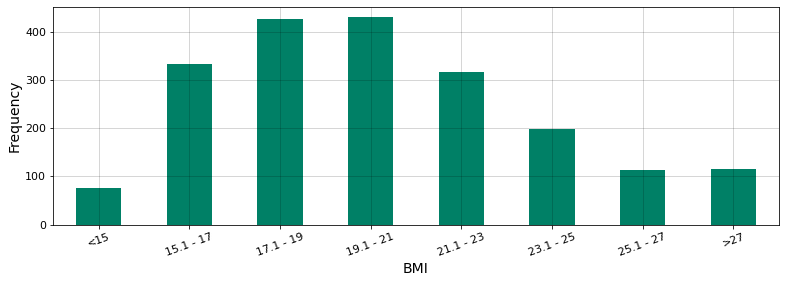

In [440]:
table_barplot1('BMI_group','Body Mass Index','BMI')

Findings:
- The mean BMI was normal at 21 +/- 4 (range 13-39)
- Majority of the patients (42%) had a normal BMI of 17-21

In [441]:
aggregate2('GCS')

mean      14.831175
median    15.000000
mode      15.000000
min        3.000000
max       15.000000
std        1.179836
Name: GCS, dtype: float64

In [442]:
table('GCS','Glasgow Coma Score')

Glasgow Coma Score Distribution among Heart Failure cohort


,Frequency,%
3,13,0.65
4,1,0.05
6,1,0.05
7,4,0.20
10,7,0.35
11,19,0.95
12,3,0.15
13,2,0.10
14,7,0.35
15,1951,97.16


Findings:
- The majority (97%) were received with GCS 15
- A small minority (<1%) had GCS 7 or below

In [443]:
# drop GCS details and consciousness, GCS score deemed adequate
hf.drop(['GCS.E','GCS.V','GCS.M', 'consciousness'], axis = 1, inplace=True)

Past History of Congestive Heart Failure Distribution among Heart Failure cohort


,Frequency,%
0,136,6.77
1,1872,93.23


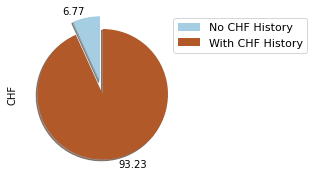

In [444]:
table_pieplot2('CHF','Past History of Congestive Heart Failure','No CHF History','With CHF History')

Findings:
- Most of the present admissions (93%) had a previous history of CHF
- A minority (7%) are newly diagnosed with CHF

Heart Failure Type Distribution among Heart Failure cohort


,Frequency,%
Both,1480,73.71
Left,477,23.75
Right,51,2.54


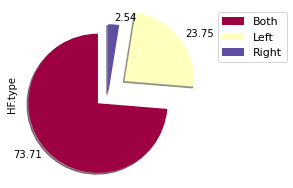

In [445]:
table_pieplot3('HF.type','Heart Failure Type','Both','Left','Right')

Findings:
- Majority of the patients (74%) had both left and right heart failures
- Left heart failure was present in 24%
- Right heart failure was present as a minority (3%)

NYHA Classification Distribution among Heart Failure cohort


,Frequency,%
2,353,17.58
3,1039,51.74
4,616,30.68


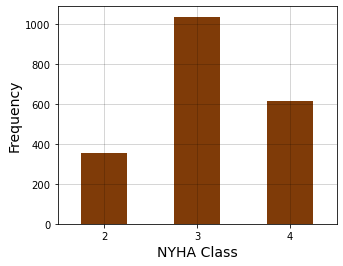

In [446]:
table_barplot2('NYHA', 'NYHA Classification', 'NYHA Class')

Findings:
- More than half of the patients (52%) were of NYHA III classification
- Almost a third (31%) were in NYHA IV

History of Myocardial Infarction Distribution among Heart Failure cohort


,Frequency,%
0,1865,92.88
1,143,7.12


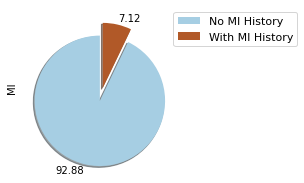

In [447]:
table_pieplot2('MI','History of Myocardial Infarction','No MI History','With MI History')

Findings:
- Only a minority (7%) had a previous MI

Killip Classification Distribution among Heart Failure cohort


,Frequency,%
1,527,26.25
2,1029,51.25
3,392,19.52
4,60,2.99


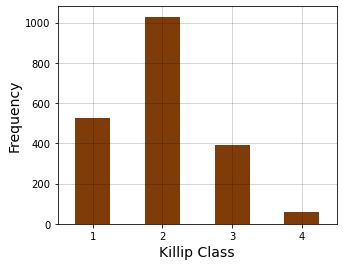

In [448]:
table_barplot2('Killip','Killip Classification','Killip Class')

Findings:
- More than half of the patients (51%) were in Killip class II
- A small minority (3%) were in Killip IV

Diabetes Mellitus Distribution among Heart Failure cohort


,Frequency,%
0,1542,76.79
1,466,23.21


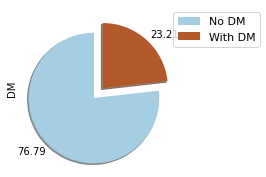

In [449]:
table_pieplot2('DM','Diabetes Mellitus','No DM','With DM')

Findings:
- Only a quarter (23%) had DM

Distribution of Peripheral Vascular Diseae and Cerebrovascular Disease among HF cohort


,Frequency,%
No PVD,1907,94.97
With PVD,101,5.03
No CVD,1858,92.53
With CVD,150,7.47


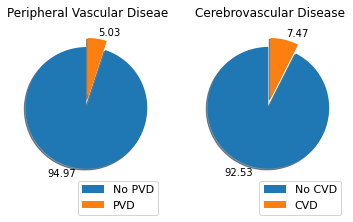

In [450]:
table_piesubplot2('PVD','CVD', 'Peripheral Vascular Diseae','Cerebrovascular Disease')

Findings:
- Only a minority of patients have PVD (5%) or CVD (7%)

Distribution of Chronic Kidney Disease and Acute Renal Failure among HF cohort


,Frequency,%
No CKD,1534,76.39
With CKD,474,23.61
No ARF,2001,99.65
With ARF,7,0.35


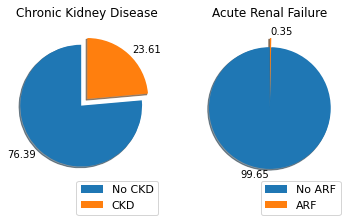

In [451]:
table_piesubplot2('CKD','ARF','Chronic Kidney Disease','Acute Renal Failure')

Findings:
- Almost a quarter of the patients (24%) had CKD
- A small minority (<1%) suffered acute renal failure

Distribution of Chronic Obstructive Pulmonary Disease and Type II Resp Failure among HF cohort


,Frequency,%
No COPD,1775,88.40
With COPD,233,11.60
NonTypeII,1894,94.32
TypeII,114,5.68


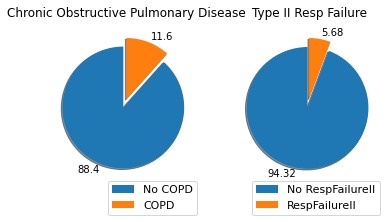

In [452]:
table_piesubplot2('COPD','RespFailureII','Chronic Obstructive Pulmonary Disease','Type II Resp Failure')

Findings:
- Only 12% of the patients had COPD
- A minority of the patients (6%) developed Type II respiratory failure

In [453]:
table('resp.support', 'Ventilatory Support')

Ventilatory Support Distribution among Heart Failure cohort


,Frequency,%
IMV,25,1.25
NIMV,17,0.85
NoSupport,1966,97.91


Findings:
- Majority of the patients (98%) did not need ventilatory support

In [454]:
table('O2','Oxygen supplementation')

Oxygen supplementation Distribution among Heart Failure cohort


,Frequency,%
AmbientAir,110,5.48
OxygenTherapy,1898,94.52


Findings:
- Majority of the patients (95%) needed Oxygen supplementation

In [455]:
aggregate2('FiO2')

mean       32.670319
median     33.000000
mode       33.000000
min        21.000000
max       100.000000
std         4.756961
Name: FiO2, dtype: float64

In [456]:
var= hf['FiO2']
labels = ['21-40', '41-60','61-80','81-100']
bins = [21, 40, 60, 80, 100]
loc = (hf.columns.get_loc('FiO2')) + 1
newcolumn = 'FiO2_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

In [457]:
table('FiO2_group','FiO2 Supplementation (%)')

FiO2 Supplementation (%) Distribution among Heart Failure cohort


,Frequency,%
21-40,1964,97.81
41-60,38,1.89
61-80,2,0.10
81-100,4,0.20


Findings:
- The mean oxygen supplementation was at FiO2 33 +/- 5 (range 21- 100%)
- Majority of the patients (98%) needed only low dose supplemental O2 (21-40%)

Distribution of Comorbidities among HF Cohort

CTD


,Frequency,%
0,2004,99.800797
1,4,0.199203


PUD


,Frequency,%
0,1963,97.758964
1,45,2.241036


liver.disease


,Frequency,%
0,1924,95.816733
1,84,4.183267


dementia


,Frequency,%
0,1893,94.272908
1,115,5.727092


hemiplegia


,Frequency,%
0,1996,99.40239
1,12,0.59761


lymphoma


,Frequency,%
0,2007,99.950199
1,1,0.049801


solid.tumor


,Frequency,%
0,1969,98.057769
1,39,1.942231


AIDS


,Frequency,%
0,2004,99.800797
1,4,0.199203


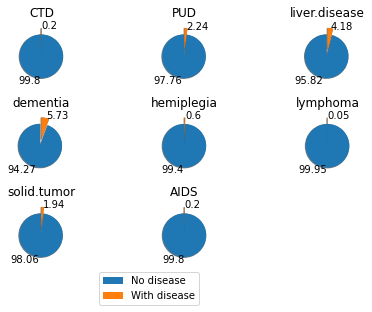

In [458]:
print('Distribution of Comorbidities among HF Cohort\n')
variables = ['CTD','PUD','liver.disease','dementia','hemiplegia','lymphoma','solid.tumor','AIDS']
number =0
row=0
for var in variables:
    if number < 3:
        print(var)
        value = hf[var].value_counts().sort_index()
        percent = (value/2008) *100
        table = pd.concat([value,percent], axis = 1, keys = ['Frequency','%'])
        display(table)
        plt.subplot2grid((3,3), (row, number))
        plt.tight_layout()
        plt.pie(value, explode = (0.3, 0), labels = percent.round(2), shadow = True, startangle = 90)
        plt.title(var)
        number +=1
        if number==3: 
            row+=1
            number =0
plt.legend(labels = ('No disease', 'With disease'), bbox_to_anchor = (0.85,-0.2),fontsize=10);

In [459]:
hf['leukemia'].value_counts()

0    2008
Name: leukemia, dtype: int64

In [460]:
# leukemia not present ==> drop
hf.drop('leukemia',axis =1, inplace=True)

Findings:
- Non-cardiovascular comorbidities are infrequent in the HF cohort, with the presence ranging from 0% (leukemia) to 6% (dementia)

CCI score Distribution among Heart Failure cohort


,Frequency,%
0,56,2.79
1,775,38.60
2,699,34.81
3,368,18.33
4,94,4.68
5,15,0.75
6,1,0.05


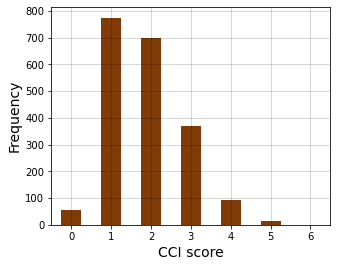

In [461]:
table_barplot2('CCI.score', 'CCI score', 'CCI score')

Findings:
- Most of the patients were in the CCI score range of 1-3

In [462]:
aggregate2('LVEDD')

mean      53.064243
median    52.000000
mode      52.000000
min        0.000000
max       88.000000
std        8.880952
Name: LVEDD, dtype: float64

In [463]:
hf [ hf['LVEDD'] <20]

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,WBC,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,fibrinogen,CK,CK.enz,CK.enz.CK,GFR,crea,urea,uric.acid,cystatin,CO2.BC,Na,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,BNP,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,discharge,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
203,"(59,69]",Female,1,Emergency,71,50-75,20,16-20,200,>170,100,91-110,133.333333,>130,36.0,35.0 - 36.0,55,51-60,23,21.1 - 23,15,1,Both,2,0,2,0,1,0,0,0,0,TypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,0,9.34,0.27,0.029,6.74,0.722,2.28,0.03,0.003,0.02,0.002,3.91,113,0.346,13.4,42.8,88,28.8,326,190,13.1,16.7,0.249,1.16,33,15.7,77,1.16,2.12,5.06,84,83.0,0.99,70,77,8.491758,433,1.45,13.3,133,5.43,100,2.51,0.990000,660,17,666,487,2.9,19.149807,32,39.4,0.8,29,32.0,2.1,5.6,7.7,68,4.6,71,4.81,2.63,0.86,1.83,Alive,8,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
1164,"(29,39]",Female,1,NonEmergency,60,50-75,18,16-20,100,91 - 110,60,51-70,73.333333,71-90,36.1,36.1 - 37.0,54,51-60,24,23.1 - 25,15,1,Both,3,0,1,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,1,0,6.23,0.64,0.103,3.37,0.540,2.15,0.02,0.004,0.05,0.008,4.44,123,0.386,16.7,51.2,86,27.6,318,302,8.5,15.5,0.257,1.24,35,17.1,55,1.26,2.01,2.34,89,15.8,0.17,79,84,6.570000,557,1.12,23.8,143,5.08,108,2.15,0.817057,183,10,225,2400,2.9,22.500000,31,21.6,1.5,18,25.0,15.1,25.2,40.3,69,1.6,53,2.83,1.45,0.65,0.78,Alive,11,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN


In [464]:
# LVEDD value of 0 unlikely --> replacing 0 values with NaN
hf['LVEDD'] = hf['LVEDD'].replace({0: np.NaN})
hf['LVEDD'].isnull().sum()

2

In [465]:
# filling in missing values
impute_mean('LVEDD')

LVEDD null value=  0


In [466]:
aggregate2('LVEDD')

mean      53.115964
median    52.000000
mode      52.000000
min       22.000000
max       88.000000
std        8.721471
Name: LVEDD, dtype: float64

In [467]:
var= hf['LVEDD']
labels = ['<=30','31-40','41-50','51-60','61-70','>70']
bins = [0,30,40,50,60,70,90]
loc = (hf.columns.get_loc('LVEDD')) + 1
newcolumn = 'LVEDD_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Left Ventricular End Diastolic Diameter (mm) Distribution among Heart Failure cohort


,Frequency,%
<=30,7,0.35
31-40,134,6.67
41-50,427,21.26
51-60,1136,56.57
61-70,204,10.16
>70,100,4.98


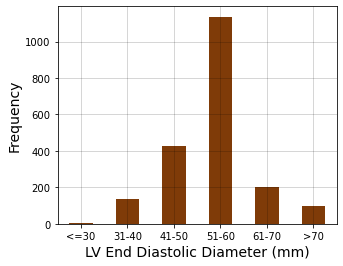

In [468]:
table_barplot2('LVEDD_group','Left Ventricular End Diastolic Diameter (mm)', 'LV End Diastolic Diameter (mm)')

Findings:
- The mean LVEDD was 53 +/- 9 (range 22-88 mm)
- More than half of the patients ranged in the high normal LVEDD values of 51-60mm
- A minority (5%) had LVEDD of more than 70mm

In [469]:
aggregate2('WBC')

mean       7.306098
median     6.525000
mode       7.131245
min        1.660000
max       32.790000
std        3.450466
Name: WBC, dtype: float64

In [470]:
var= hf['WBC']
labels = ['<=5','6-10','11-15','16-20','21-25','>25']
bins = [0,5.99 , 10.9, 15.99, 20.99, 25.99, 32]
loc = (hf.columns.get_loc('WBC')) + 1
newcolumn = 'WBC_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

White Blood Cell counts Distribution among Heart Failure cohort


,Frequency,%
<=5,813,40.49
6-10,965,48.06
11-15,175,8.72
16-20,37,1.84
21-25,12,0.60
>25,5,0.25


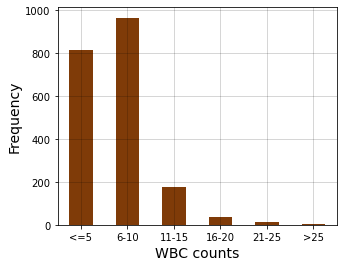

In [471]:
table_barplot2('WBC_group','White Blood Cell counts','WBC counts')

Findings:
- More than half of the patients (61%) had normal WBC counts of 6-10/L
- A minority (1%) had counts of more than 20

In [472]:
variables = ['mono.ct','mono.ratio', 'neut.ct', 'neut.ratio','lymph.ct']
for variable in variables:
    print(variable)
    aggregate2(variable)

mono.ct


mean      0.474706
median    0.420000
mode      0.330000
min       0.010000
max       2.330000
std       0.243390
Name: mono.ct, dtype: float64

mono.ratio


mean      0.068636
median    0.067000
mode      0.060000
min       0.002000
max       0.270000
std       0.026299
Name: mono.ratio, dtype: float64

neut.ct


mean       5.647848
median     4.880000
mode       5.472879
min        0.740000
max       29.940000
std        3.227162
Name: neut.ct, dtype: float64

neut.ratio


mean      0.750921
median    0.757000
mode      0.750921
min       0.207000
max       0.976000
std       0.103560
Name: neut.ratio, dtype: float64

lymph.ct


mean      1.032479
median    0.940000
mode      1.032479
min       0.080000
max       6.690000
std       0.600228
Name: lymph.ct, dtype: float64

Findings:
- The parameters had normal values
- The mean monocyte count was at 0.5 +/- 0.24 (range 0.01 - 2.3L)(*10^9/L)
- The mean monocyte ratio was at 0.07 
- The mean neutrophil count was 5.6 +/- 3.2 (range 0.74 - 30) (*10^9/L)
- The mean neutrophil ratio was 0.8 
- The mean lymphocyte count was 1 +/- 0.6 (range 0.08 - 6.7) (*10^9/L)

In [473]:
variables = ['baso.ct','baso.ratio','eo.ct','eo.ratio']
for variable in variables:
    print(variable)
    aggregate2(variable)

baso.ct


mean      0.031141
median    0.030000
mode      0.020000
min       0.000000
max       0.730000
std       0.029237
Name: baso.ct, dtype: float64

baso.ratio


mean      0.004592
median    0.004000
mode      0.003000
min       0.000000
max       0.063000
std       0.003614
Name: baso.ratio, dtype: float64

eo.ct


mean      0.119399
median    0.060000
mode      0.010000
min       0.000000
max       6.580000
std       0.244534
Name: eo.ct, dtype: float64

eo.ratio


mean      0.018520
median    0.010000
mode      0.000000
min       0.000000
max       0.620000
std       0.031034
Name: eo.ratio, dtype: float64

Findings:
- The mean basophil count was normal at 0.3 +/- 0.3 (range 0 - 0.73) (*10^9/L)
- The mean basophil ratio was normal at 0.005 
- The mean eosinophil count was normal at 0.12 +/- 0.2, with a wide range of 0 - 6.6 (*10^9/L)
- The mean eosinophil ratio was low at 0.02

In [474]:
aggregate2('RBC')

mean      3.855926
median    3.880000
mode      3.855926
min       0.890000
max       7.020000
std       0.758686
Name: RBC, dtype: float64

Findings:
 - The mean RBC count was normal at 3.9 +/- 0.8 (range 0.9 - 7)(*10^12/L)

In [475]:
variables = ['Hb','Hct']
for variable in variables:
    print(variable)
    aggregate2(variable)

Hb


mean      115.062251
median    117.000000
mode      115.000000
min        29.000000
max       200.000000
std        24.360636
Name: Hb, dtype: float64

Hct


mean      0.352896
median    0.358000
mode      0.352896
min       0.094000
max       0.605000
std       0.068450
Name: Hct, dtype: float64

In [476]:
var= hf['Hb']
labels = ['<=50','51-80','81-110','111-140','141-170','>170']
bins = [0,50,80,110,140,170, 200]
loc = (hf.columns.get_loc('Hb')) + 1
newcolumn = 'Hb_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Hemoglobin (g/L) Distribution among Heart Failure cohort


,Frequency,%
<=50,21,1.05
51-80,168,8.37
81-110,567,28.24
111-140,1004,50.00
141-170,231,11.50
>170,17,0.85


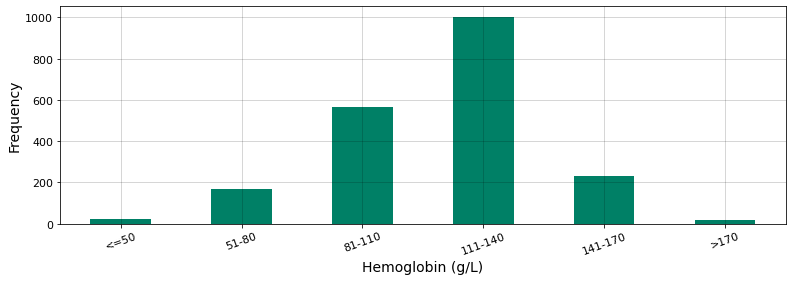

In [477]:
table_barplot1('Hb_group','Hemoglobin (g/L)','Hemoglobin (g/L)')

Findings:
- The mean hemoglobin value was normal at 115 +/- 24 (range 29-200 g/L)
- Majority of the patients (78%) have acceptable hemoglobin values (81-140)
- A minority (9%) have low hemoglobin (<80), with 1% having hemoglobin of 50 or below
- The mean hematocrit value was 0.35 +/- 0.07 (range 0.09 - 0.6)

In [478]:
variables = ['CV.RBC.DW','SD.RBC.DW','MCV','MHV', 'MHC']
for variable in variables:
    print(variable)
    aggregate2(variable)

CV.RBC.DW


mean      14.918114
median    14.400000
mode      14.000000
min       11.800000
max       29.900000
std        1.992112
Name: CV.RBC.DW, dtype: float64

SD.RBC.DW


mean      48.839059
median    47.900000
mode      48.400000
min       32.300000
max       98.000000
std        6.429641
Name: SD.RBC.DW, dtype: float64

MCV


mean       91.576195
median     93.000000
mode       92.000000
min        57.000000
max       135.000000
std         8.754822
Name: MCV, dtype: float64

MHV


mean      29.931162
median    30.500000
mode      31.300000
min       15.600000
max       45.300000
std        3.397923
Name: MHV, dtype: float64

MHC


mean      324.811255
median    326.000000
mode      323.000000
min       252.000000
max       363.000000
std        13.867540
Name: MHC, dtype: float64

Findings:
- The parameters had normal values
- The mean coefficient of variation of RBC distribution width was 15 +/- 2 (range 12-30%)
- The mean standard deviation of RBC distribution width was 49 +/- 6 (range 32-98 fL)
- The mean Mean corpuscular volume was 92 +/- 8 (range 57-135 fL)
- The mean Mean hemoglobin volume was 30 +/- 3 (range 16-45 pg)
- The mean Mean hemoglobin concentration was 325 +/- 14 (range 252- 363 g/L)

In [479]:
aggregate2('Plt')

mean      145.143924
median    136.000000
mode      145.000000
min         5.000000
max       646.000000
std        64.484964
Name: Plt, dtype: float64

In [480]:
var= hf['Plt']
labels = ['<50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','>400']
bins = [0,50,100,150,200,250,300,350,400,650]
loc = (hf.columns.get_loc('Plt')) + 1
newcolumn = 'Plt_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Platelet Count Distribution among Heart Failure cohort


,Frequency,%
<50,26,1.29
51-100,463,23.06
101-150,736,36.65
151-200,481,23.95
201-250,180,8.96
251-300,74,3.69
301-350,26,1.29
351-400,11,0.55
>400,11,0.55


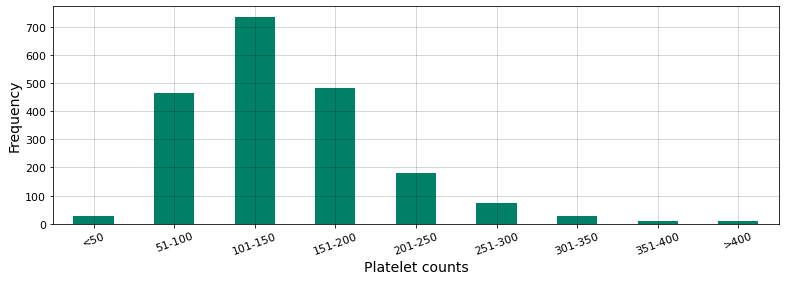

In [481]:
table_barplot1('Plt_group','Platelet Count','Platelet counts')

Findings:
- The mean platelet count was normal at 145 +/- 64 (range 5-646) (*10^9/L)
- Majority of the patients (70%) had good platelet levels (101-250)
- Almost a quarter (23%) had low to low-normal counts (51-100)
- A small minority (2%) had either very low (<50) or very high counts (>400)

In [482]:
variables = ['MPV','P.DW','Plt.hct']
for variable in variables:
    print(variable)
    aggregate2(variable) 

MPV


mean      12.113333
median    12.113333
mode      12.113333
min        7.700000
max       17.600000
std        1.653500
Name: MPV, dtype: float64

P.DW


mean      16.364105
median    16.300000
mode      16.200000
min        9.500000
max       25.100000
std        1.454185
Name: P.DW, dtype: float64

Plt.hct


mean      0.173688
median    0.170000
mode      0.173688
min       0.009000
max       0.702000
std       0.065951
Name: Plt.hct, dtype: float64

Findings:
- The MPV, PDW, Plt-hct means were within normal values
- The mean Mean Platelet Volume was 12 +/- 1.6 (range 8-18 fL)
- The mean Platelet Distribution Width was 16 +/- 1.5 (range 10-25 fL)
- The mean Platelet- hematocrit was 0.17 +/- 0.07 (range 0.01 - 0.7%)

In [483]:
variables = ['INR','APTT','TT']
for variable in variables:
    print(variable)
    aggregate2(variable) 

INR


mean       1.349970
median     1.220000
mode       1.160000
min        0.830000
max       16.590000
std        0.707678
Name: INR, dtype: float64

APTT


mean       34.947211
median     34.000000
mode       35.000000
min        20.000000
max       181.000000
std         8.236611
Name: APTT, dtype: float64

TT


mean       17.244174
median     17.200000
mode       17.600000
min         9.700000
max       209.300000
std         5.891587
Name: TT, dtype: float64

Findings:
- The mean INR, APTT and TT were within normal values
- The mean INR was 1.3 +/- 0.7 (range 0.8 - 17)
- The mean APTT was 35 +/- 8 (range 20-181 s)
- The mean TT was 17 +/- 6 (range 10-209 s)

In [484]:
variables = ['PT.act','PT.ratio']
for variable in variables:
    print(variable)
    aggregate2(variable) 

PT.act


mean       65.954681
median     68.000000
mode       74.000000
min         3.000000
max       141.000000
std        18.251180
Name: PT.act, dtype: float64

PT.ratio


mean       1.353376
median     1.220000
mode       1.220000
min        0.850000
max       14.890000
std        0.675267
Name: PT.ratio, dtype: float64

Findings:
- The mean Prothrombin activity was slightly low at 66 +/- 18 (range 3-141)
- The mean Prothrombin time ratio was 1.4 +/- 0.7 (range 0.8 - 15)

In [485]:
variables = ['fibrinogen','Ddimer']
for variable in variables:
    print(variable)
    aggregate2(variable) 

fibrinogen


mean      3.223830
median    3.060000
mode      3.223830
min       0.510000
max       8.320000
std       1.035749
Name: fibrinogen, dtype: float64

Ddimer


mean        2.343304
median      1.170000
mode        1.140000
min         0.000000
max       100.100000
std         5.116474
Name: Ddimer, dtype: float64

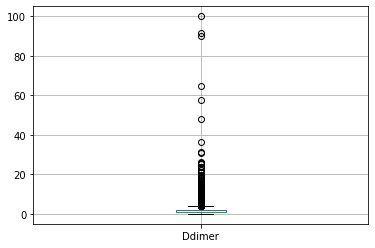

In [486]:
hf.boxplot('Ddimer');

In [487]:
var= hf['Ddimer']
labels = ['0','0.01 - 0.55','0.056 - 5','6-10','11 - 15','16-20','>20']
bins = [0, 0.009, 0.55, 5.99, 10.99, 15.99, 20.99, 100]
loc = (hf.columns.get_loc('Ddimer')) + 1
newcolumn = 'Ddimer_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

D-dimer Distribution among Heart Failure cohort


,Frequency,%
0,4,0.20
0.01 - 0.55,106,5.28
0.056 - 5,1777,88.50
6-10,71,3.54
11 - 15,21,1.05
16-20,10,0.50
>20,18,0.90


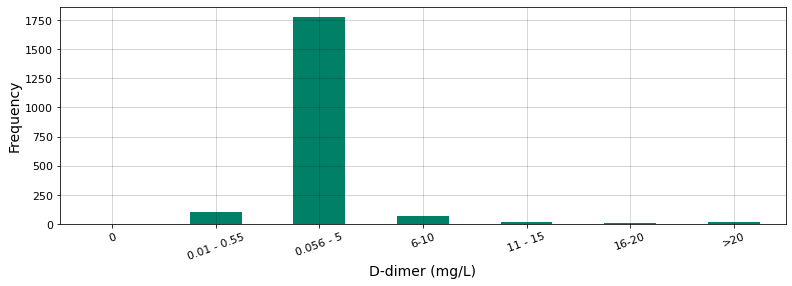

In [488]:
table_barplot1('Ddimer_group','D-dimer','D-dimer (mg/L)')

Findings:
- The mean fibrinogen was normal at 3.2 +/- 1 (range 0.5-8 g/L)
- The mean D-dimer was mildly elevated at 2.3 +/- 5 (range 0-100), likely due to outliers
- The median and mode values of D-dimer also showed slightly elevated values (1.17 and 1.14, respectively)
- Majority of patients (86%) had mildly high D-dimer values (0.056 -5 mg/L)
- A minority (1%) had elevated D-dimer values >20

In [489]:
variables = ['CK','CK.enz','CK.enz.CK']
for variable in variables:
    print(variable)
    aggregate2(variable) 

CK


mean       131.036355
median      90.000000
mode        89.000000
min         17.000000
max       5920.000000
std        267.556457
Name: CK, dtype: float64

CK.enz


mean       19.325847
median     15.800000
mode       15.800000
min         0.900000
max       424.000000
std        18.585867
Name: CK.enz, dtype: float64

CK.enz.CK


mean      0.205643
median    0.170000
mode      0.170000
min       0.013043
max       1.000000
std       0.141899
Name: CK.enz.CK, dtype: float64

In [490]:
var= hf['CK']
labels = ['<=50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','>400']
bins = [0,50,100, 150, 200, 250, 300, 350, 400, 6000]
loc = (hf.columns.get_loc('CK')) + 1
newcolumn = 'CK_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Creatine Kinase (IU/L) Distribution among Heart Failure cohort


,Frequency,%
<=50,247,12.30
51-100,1005,50.05
101-150,391,19.47
151-200,161,8.02
201-250,69,3.44
251-300,33,1.64
301-350,26,1.29
351-400,20,1.00
>400,56,2.79


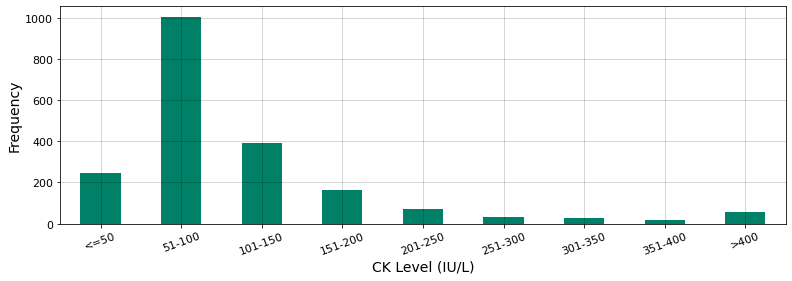

In [491]:
table_barplot1('CK_group','Creatine Kinase (IU/L)', 'CK Level (IU/L)')

Findings:
- The mean CK was 131 +/- 268 (range 17-5920 IU/L).  The mean value was normal despite the outliers.
- Only a minority of the patients (7%) had elevated CK values of >250 IU/L
- The mean CK isoenzyme level was normal at 19 +/- 19 (range 1 - 424 IU/L)
- The mean CK isoenzyme to CK ratio was elevated at 0.21 +/- 0.14 (range 0.01 - 1)

In [492]:
aggregate2('GFR')

mean       68.025896
median     65.000000
mode       67.000000
min         3.000000
max       281.000000
std        36.057245
Name: GFR, dtype: float64

In [493]:
var= hf['GFR']
labels = ['<25','26-50','51-75','76-100','101-125','126-150','151-175','176-200','>200']
bins = [0,25, 50, 75, 100, 125, 150, 175, 200, 281]
loc = (hf.columns.get_loc('GFR')) + 1
newcolumn = 'GFR_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Glomerular Filtration Rate Distribution among Heart Failure cohort


,Frequency,%
<25,198,9.86
26-50,480,23.90
51-75,604,30.08
76-100,400,19.92
101-125,202,10.06
126-150,71,3.54
151-175,34,1.69
176-200,10,0.50
>200,9,0.45


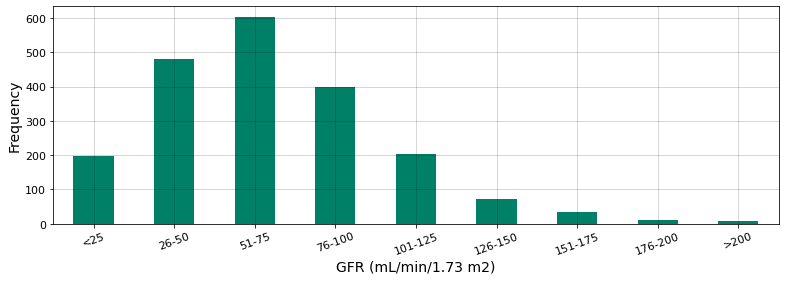

In [494]:
table_barplot1('GFR_group','Glomerular Filtration Rate','GFR (mL/min/1.73 m2)')

Findings:
- The mean Glomerular Filtrate Rate was low at 68 +/- 36 (range 3 - 281 mL/min/1.73 m2)
- Majority of the patients (64%) had a GFR of 75 and lower
- Very low GFRs of <25 was present in 10% of the patients

In [495]:
aggregate2('crea')

mean      108.201195
median     86.000000
mode       63.000000
min        27.000000
max       963.000000
std        78.712841
Name: crea, dtype: float64

In [496]:
var= hf['crea']
labels = ['<=50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','>400']
bins = [0,50, 100, 150, 200, 250, 300, 350, 400, 963]
loc = (hf.columns.get_loc('crea')) + 1
newcolumn = 'crea_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Creatinine Level (umol/L) Distribution among Heart Failure cohort


,Frequency,%
<=50,159,7.92
51-100,1093,54.43
101-150,453,22.56
151-200,143,7.12
201-250,64,3.19
251-300,30,1.49
301-350,24,1.20
351-400,14,0.70
>400,28,1.39


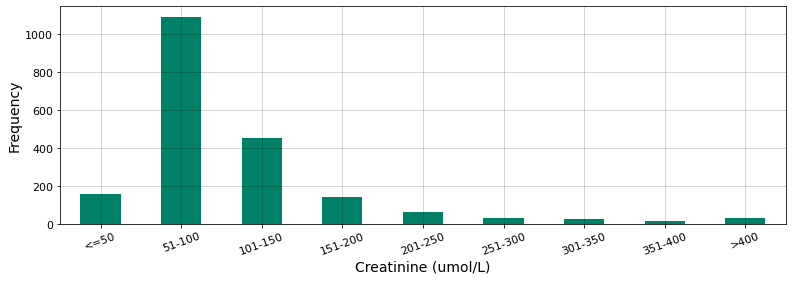

In [497]:
table_barplot1('crea_group','Creatinine Level (umol/L)', 'Creatinine (umol/L)')

Findings:
- The mean creatinine value was mildly elevated (108 umol/L +/- 79 (range 27-963)), likely due to outliers
- The median (86) and mode (63) creatinine levels were normal
- Majority of the patients (77%) had normal or high-normal creatinine levels (51-150 umol/L)
- A minority (2%) had creatinine levels above 300

In [498]:
aggregate2('urea')

mean       9.563784
median     8.120000
mode       9.139270
min        1.580000
max       45.630000
std        5.515029
Name: urea, dtype: float64

In [499]:
var= hf['urea']
labels = ['<= 5','5.1 -10','11 - 15','16 - 20','21 - 25','> 25']
bins = [0,5.99, 10.99, 15.99, 20.99, 25.99, 46]
loc = (hf.columns.get_loc('urea')) + 1
newcolumn = 'urea_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Urea Level (mmol/L) Distribution among Heart Failure cohort


,Frequency,%
<= 5,532,26.49
5.1 -10,922,45.92
11 - 15,334,16.63
16 - 20,119,5.93
21 - 25,61,3.04
> 25,40,1.99


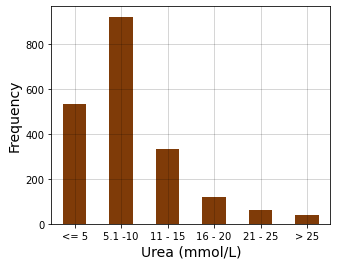

In [500]:
table_barplot2('urea_group','Urea Level (mmol/L)', 'Urea (mmol/L)')

Findings:
-  The mean urea level was slightly elevated at 10 +/- 6 (range 2-46 mmol/L)
- Majority of the patients (52%) had normal-high normal values at 5.1-10 mmol/L
- A minority (2%) had high levels of more than 25

In [501]:
variables = ['uric.acid','cystatin']
for variable in variables:
    print(variable)
    aggregate2(variable) 

uric.acid


mean       482.678785
median     457.000000
mode       451.000000
min         62.000000
max       1409.000000
std        168.718816
Name: uric.acid, dtype: float64

cystatin


mean       1.836459
median     1.540000
mode       1.510000
min        0.230000
max       10.370000
std        0.942616
Name: cystatin, dtype: float64

Findings:
- The mean values of Uric acid and Cystatin were mildly elevated
- The mean uric acid level was 482 +/- 169 (range 62-1409 umol/L)
- The mean cystatin level was 1.8 +/- 1 (range 0.2 - 10 mg/L)

In [502]:
aggregate2('CO2.BC')

mean      23.816174
median    23.900000
mode      23.700000
min        2.100000
max       47.200000
std        4.830059
Name: CO2.BC, dtype: float64

Findings:
- The mean CO2 binding capacity level was normal at 24 +/- 5 (range 2-47 mmol/L)

In [503]:
variables = ['Na','K','Cl','Ca']
for variable in variables:
    print(variable)
    aggregate2(variable) 

Na


mean      137.894920
median    139.000000
mode      139.000000
min       107.000000
max       159.000000
std         4.919017
Name: Na, dtype: float64

K


mean       3.981462
median     3.880000
mode       3.580000
min        1.670000
max       11.100000
std        0.703871
Name: K, dtype: float64

Cl


mean      101.337649
median    102.000000
mode      104.000000
min        70.000000
max       125.000000
std         6.039113
Name: Cl, dtype: float64

Ca


mean      2.292944
median    2.290000
mode      2.230000
min       1.390000
max       3.370000
std       0.180072
Name: Ca, dtype: float64

In [504]:
var= hf['Na']
labels = ['<= 125','126-130','131-135','136-140','141-145','146-150','>150']
bins = [0, 125, 130, 135, 140, 145, 150, 159]
loc = (hf.columns.get_loc('Na')) + 1
newcolumn = 'Na_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Serum Sodium Level (mmol/L) Distribution among Heart Failure cohort


,Frequency,%
<= 125,45,2.24
126-130,90,4.48
131-135,355,17.68
136-140,905,45.07
141-145,576,28.69
146-150,33,1.64
>150,4,0.20


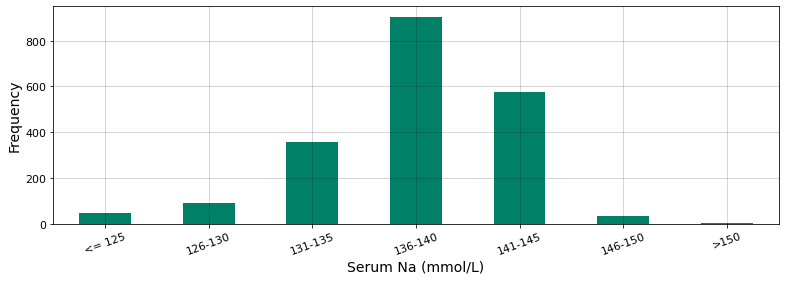

In [505]:
table_barplot1('Na_group','Serum Sodium Level (mmol/L)', 'Serum Na (mmol/L)')

Findings:
- The mean serum sodium level was normal at 138 +/- 5 (range 107-159 mmol/L)
- The mean serum potassium level was normal at 4 +/- 0.7 (range 1.7-11 mmol/L)
- The mean serum chloride level was normal at 101 +/- 6 (range 70-125 mmol/L)
- The mean serum calcium lvel was normal at 2.3 +/- 0.2 (range 1.4 - 3.4 mmol/L)
- Majority of the patients (91%) were distributed within the range of low-normal to high-normal sodium values of (131-145 mmol/L)
- A minority (2%) had very low serum sodium of 125 or below

In [507]:
variables = ['HBD.LDH', 'HBD','AST']
for variable in variables:
    print(variable)
    aggregate2(variable) 

HBD.LDH


mean      0.817057
median    0.817057
mode      0.817057
min       0.360000
max       1.150000
std       0.088612
Name: HBD.LDH, dtype: float64

HBD


mean       212.125000
median     184.000000
mode       183.000000
min         78.000000
max       2666.000000
std        136.140047
Name: HBD, dtype: float64

AST


mean        52.274402
median      20.000000
mode        20.000000
min          3.000000
max       4928.000000
std        198.905252
Name: AST, dtype: float64

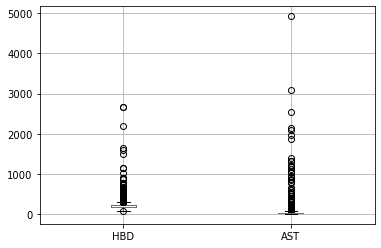

In [508]:
hf.boxplot(['HBD','AST']);

Findings:
- The mean Hydroxybuterate Dehydrogenase : Lactate Dehydrogenase ratio was normal at 0.8 +/- 0.1 (range 0.4-1.2)
- The HBD median and mode were high normal at 184 and 183 U/L, respectively.  The mean was affected by outliers.
- The median and mode Aspartate Transaminase (AST) levels were normal at 25.  The mean was affected by outliers.

In [509]:
aggregate2('LDH')

mean       268.200697
median     226.000000
mode       225.000000
min        107.000000
max       6279.000000
std        237.944398
Name: LDH, dtype: float64

In [510]:
var= hf['LDH']
labels = ['<= 100','101-200','201-300','301-400','401-500','> 500']
bins = [0,100,200,300,400,500,7000]
loc = (hf.columns.get_loc('LDH')) + 1
newcolumn = 'LDH_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Lactate Dehydrogenase (IU/L) Distribution among Heart Failure cohort


,Frequency,%
<= 100,0,0.00
101-200,527,26.25
201-300,1143,56.92
301-400,205,10.21
401-500,56,2.79
> 500,77,3.83


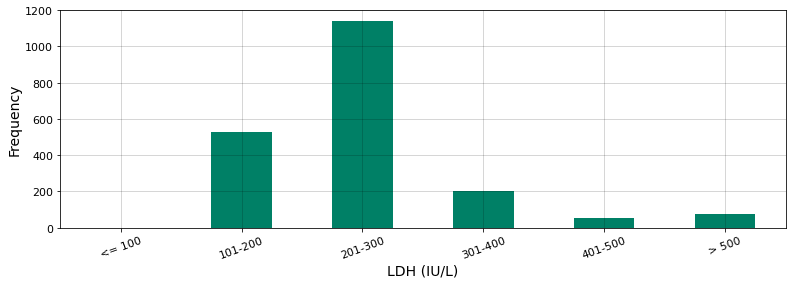

In [511]:
table_barplot1('LDH_group','Lactate Dehydrogenase (IU/L)','LDH (IU/L)')

Findings:
- The mean Lactate dehydrogenase level was normal at 268 +/- 237 (range 107-6279 IU/L)
- Majority of the patients (82%) had normal levels between 101-300
- A minority (4%) had high levels of more than 500 IU/L

In [512]:
aggregate2('BNP')

mean      1271.066235
median     744.000000
mode      5000.000000
min          2.000000
max       5000.000000
std       1344.311645
Name: BNP, dtype: float64

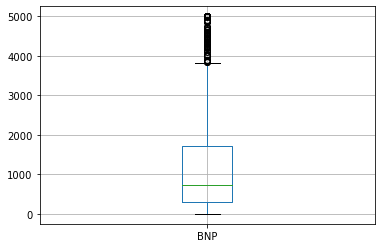

In [513]:
hf.boxplot('BNP');

In [514]:
var= hf['BNP']
labels = ['<= 100','101-500','501-1000','1001-2000','2001-3000','3001-4000','4001-5000']
bins = [0,100,500,1000,2000,3000,4000,5000]
loc = (hf.columns.get_loc('BNP')) + 1
newcolumn = 'BNP_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Brain Natriuretic Peptide level (pg/ml) Distribution among Heart Failure cohort


,Frequency,%
<= 100,148,7.37
101-500,590,29.38
501-1000,445,22.16
1001-2000,409,20.37
2001-3000,176,8.76
3001-4000,83,4.13
4001-5000,157,7.82


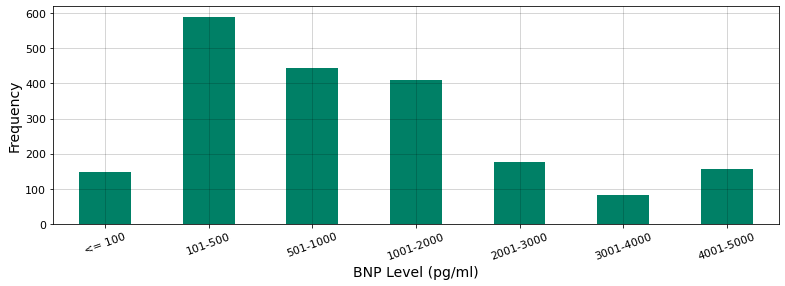

In [515]:
table_barplot1('BNP_group','Brain Natriuretic Peptide level (pg/ml)','BNP Level (pg/ml)')

Findings:
- The mean Brain Natriuretic Peptide level distribution was irregular, with the all central tendencies being elevated (mean 1271, median 744, mode 5000 pg/ml)

In [516]:
variables = ['nucleotidase','fucosidase']
for variable in variables:
    print(variable)
    aggregate2(variable) 

nucleotidase


mean       3.970070
median     2.900000
mode       2.900000
min        0.300000
max       31.400000
std        3.157641
Name: nucleotidase, dtype: float64

fucosidase


mean      19.360403
median    19.139841
mode      19.139841
min        3.800000
max       59.200000
std        5.219636
Name: fucosidase, dtype: float64

Findings:
- The mean nucleotidase was normal at 4 +/- 3 (range 0.3-31 U/L)
- The mean fucosidase was normal at 19 +/- 5 (range 4-59 U/L)

In [517]:
variables = ['albumin','globulin','w.glob.ratio']
for variable in variables:
    print(variable)
    aggregate2(variable) 

albumin


mean      36.082171
median    36.000000
mode      36.000000
min       12.000000
max       52.000000
std        4.853481
Name: albumin, dtype: float64

globulin


mean      28.570489
median    28.150556
mode      28.150556
min       13.700000
max       88.300000
std        5.902564
Name: globulin, dtype: float64

w.glob.ratio


mean      1.330283
median    1.300000
mode      1.300000
min       0.100000
max       2.600000
std       0.301327
Name: w.glob.ratio, dtype: float64

Findings:
- The mean albumin level was  normal at 36 +/- 5 (range 12-52 g/L)
- The mean globulin level was normal at 29 +/- 6 (range 14-88 g/L)
- The mean white globulin ratio was normal at 1.3 +/- 0.3 (range 0.1-2.6)

In [519]:
variables = ['GTP','ALT']
for variable in variables:
    print(variable)
    aggregate2(variable) 

GTP


mean       61.056275
median     42.000000
mode       57.000000
min         5.000000
max       721.000000
std        66.746651
Name: GTP, dtype: float64

ALT


mean        58.527141
median      25.000000
mode        25.000000
min          5.000000
max       6640.000000
std        278.323268
Name: ALT, dtype: float64

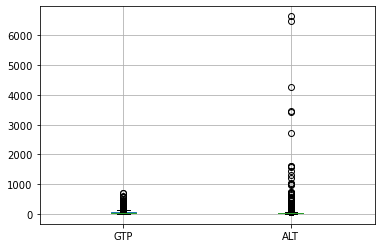

In [520]:
hf.boxplot(['GTP','ALT']);

Findings:
- The median Glutamyltranspeptidase level was normal at 42 U/L.  The mean was high-normal due to outliers
- The median Alanine Transaminase (ALT) was normal at 20 U/L.  The mean was high-normal due to outliers.

In [521]:
variables = ['DB','IB','TB']
for variable in variables:
    print(variable)
    aggregate2(variable) 

DB


mean        8.897659
median      6.400000
mode        6.400000
min         0.300000
max       179.800000
std         9.319757
Name: DB, dtype: float64

IB


mean       13.711616
median     12.100000
mode       13.563498
min         1.000000
max       128.600000
std         9.012752
Name: IB, dtype: float64

TB


mean       22.513894
median     18.300000
mode       18.300000
min         1.600000
max       256.600000
std        17.063442
Name: TB, dtype: float64

Findings:
- The median direct bilirubin level was normal at 6.4 umol/L.  The mean was high-normal due to outliers.
- The mean indirect biliubin was normal at 14 +/- 9 (range 1-128)
- The median total bilirubin was level normal at 18.3 umol/L.  The mean was high-normal due to outliers.

In [522]:
variables = ['AP','bile','TP']
for variable in variables:
    print(variable)
    aggregate2(variable) 

AP


mean        88.989044
median      79.000000
mode        79.000000
min         19.000000
max       1085.000000
std         44.151333
Name: AP, dtype: float64

bile


mean        7.580279
median      4.600000
mode        4.500000
min         0.000000
max       170.200000
std        11.765588
Name: bile, dtype: float64

TP


mean       64.631972
median     64.000000
mode       64.000000
min        41.000000
max       100.000000
std         7.157389
Name: TP, dtype: float64

Findings:
- The median Alkaline Phosphatase value was normal at 79 U/L.  The mean was normal despite the high variability of values.
- The Bile level was normal, although with high variation.  The mean was 8 and the median was 5 umol/L.
- The mean Total Protein was normal at 65 +/- 7 range (41-100 g/L)

In [523]:
variables = ['cholesterol','LDL','HDL','triglyceride']
for variable in variables:
    print(variable)
    aggregate2(variable) 

cholesterol


mean       3.723467
median     3.687416
mode       3.687416
min        1.200000
max       10.000000
std        1.033469
Name: cholesterol, dtype: float64

LDL


mean      1.860665
median    1.833608
mode      1.833608
min       0.350000
max       6.410000
std       0.719098
Name: LDL, dtype: float64

HDL


mean      1.103319
median    1.091750
mode      1.101582
min       0.020000
max       2.740000
std       0.334288
Name: HDL, dtype: float64

triglyceride


mean       1.160627
median     1.010000
mode       1.158270
min        0.220000
max       24.450000
std        1.024092
Name: triglyceride, dtype: float64

Findings:
- The mean Cholesterol level was normal at 4 +/- 1 (range 1-10 mmol/L)
- The mean Low Density Lipoprotein level was normal at 2 +/- 0.7 (range 0.4 -6 mmol/L)
- The mean High Density Lipoprotein level was normal at 1 +/- 0.3 (range 0.02 -2.7 mmol/L)
- The mean Triglyceride level was normal at 1.2 +/- 1 (range 0.2 - 24 mmol/L)

Hospitalization Outcome Distribution among Heart Failure cohort


,Frequency,%
Alive,1890,94.12
Dead,11,0.55
DischargeAgainstOrder,107,5.33


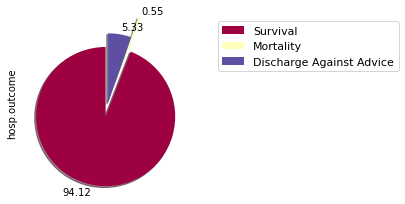

In [524]:
table_pieplot3('hosp.outcome','Hospitalization Outcome','Survival','Mortality','Discharge Against Advice')

Findings:
- Most of the patients (94%) were discharged alive
- In-hospital mortality rate was 0.55%

In [525]:
hf.rename(columns ={'discharge':'LOS'}, inplace=True)

In [526]:
aggregate2('LOS')

mean        9.420817
median      8.000000
mode        7.000000
min         1.000000
max       123.000000
std         8.030256
Name: LOS, dtype: float64

In [527]:
var= hf['LOS']
labels = ['<= 7','8- 14','15- 21','22- 28','> 28']
bins = [0,7,14,21,28,123]
loc = (hf.columns.get_loc('LOS')) + 1
newcolumn = 'LOS_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Length of hospital stay (days) Distribution among Heart Failure cohort


,Frequency,%
<= 7,965,48.06
8- 14,815,40.59
15- 21,137,6.82
22- 28,45,2.24
> 28,46,2.29


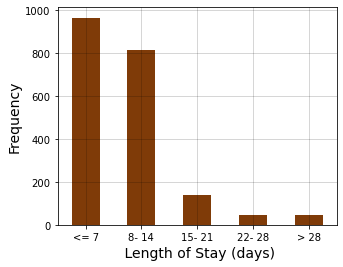

In [528]:
table_barplot2('LOS_group','Length of hospital stay (days)',' Length of Stay (days)')

Findings:
- Majority of the patients (89%) stayed in the hospital for 1-2 weeks
- A minority (2%) was hospitalized for at least 4 weeks

In [529]:
hf_alive = hf[hf['hosp.outcome']=='Alive']
hf_alive.head()

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
0,"(69,79]",Male,1,NonEmergency,87,76-100,19,16-20,102,91 - 110,64,51-70,76.666667,71-90,36.7,36.1 - 37.0,50,<=50,18,17.1 - 19,15,0,Both,3,0,3,1,0,0,0,0,1,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,52.0,51-60,9.43,6-10,0.80,0.085,7.05,0.746,1.51,0.05,0.006,0.02,0.002,4.09,131,111-140,0.387,15.0,50.3,94,32.0,338,102,101-150,14.0,16.6,0.142,1.39,33,17.0,60,1.37,1.19,0.056 - 5,3.84,43,<=50,9.6,0.22,58,51-75,108,101-150,12.55,11 - 15,685,1.32,21.6,134,131-135,5.59,101,2.28,0.630000,185,65,294,201-300,1500,1001-2000,3.5,20.5,38,23.8,1.6,83,81.0,6.9,11.4,18.3,61,4.9,61,3.46,1.90,0.84,2.69,Alive,11,8- 14,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
1,"(69,79]",Female,1,NonEmergency,95,76-100,18,16-20,150,131 - 150,70,51-70,96.666667,91-110,36.8,36.1 - 37.0,51,51-60,19,17.1 - 19,15,0,Both,3,0,1,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,40.0,31-40,5.32,<=5,0.35,0.066,3.73,0.702,1.18,0.01,0.002,0.05,0.009,3.93,114,111-140,0.349,13.0,40.7,88,28.9,326,123,101-150,11.3,16.1,0.139,1.16,35,18.4,65,1.18,1.06,0.056 - 5,2.62,107,101-150,17.2,0.16,85,76-100,62,51-100,4.29,<= 5,170,1.25,26.5,144,141-145,3.62,105,2.28,0.840000,170,19,203,201-300,361,101-500,2.2,21.9,40,25.4,1.6,17,21.0,5.2,13.1,18.3,69,2.4,66,3.15,1.26,1.30,0.84,Alive,8,8- 14,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
2,"(59,69]",Male,2,NonEmergency,98,76-100,18,16-20,102,91 - 110,67,51-70,78.666667,71-90,36.5,36.1 - 37.0,70,61-70,24,23.1 - 25,15,0,Both,2,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,46.0,41-50,13.01,11-15,0.67,0.051,11.54,0.887,0.75,0.03,0.002,0.02,0.002,4.43,144,141-170,0.427,12.9,44.5,96,32.6,339,169,151-200,12.0,16.5,0.203,1.10,36,14.9,85,1.09,0.83,0.056 - 5,5.74,38,<=50,14.6,0.38,31,26-50,185,151-200,15.99,11 - 15,567,2.43,21.6,142,141-145,4.15,107,2.56,0.770000,105,10,137,101-200,293,101-500,2.3,12.3,33,27.7,1.2,27,9.0,4.4,7.5,11.9,76,2.4,60,3.79,2.13,0.94,1.53,Alive,5,<= 7,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
3,"(69,79]",Male,1,Emergency,73,50-75,19,16-20,110,91 - 110,74,71-90,86.000000,71-90,36.0,35.0 - 36.0,65,61-70,22,21.1 - 23,15,0,Both,3,0,2,0,0,0,1,0,1,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,52.0,51-60,2.18,<=5,0.19,0.087,1.22,0.559,0.71,0.00,0.000,0.06,0.028,2.71,94,81-110,0.277,18.8,69.0,102,34.7,339,35,<50,12.4,19.4,0.032,1.37,38,18.3,60,1.36,1.39,0.056 - 5,2.63,89,51-100,15.8,0.17,58,51-75,104,101-150,8.16,5.1 -10,635,2.32,21.1,136,136-140,3.76,101,2.35,0.817057,183,9,225,201-300,1071,1001-2000,11.2,19.4,40,27.0,1.5,134,25.0,25.4,26.2,51.6,191,9.4,67,2.92,1.31,0.98,0.92,Alive,11,8- 14,Home,0,0,0,NaN,1,1,1,19.0,1.0,19.0
4,"(69,79]",Female,1,NonEmergency,88,76-100,19,16-20,134,131 - 150,62,51-70,86.000000,71-90,35.0,35.0 - 36.0,76,71-80,31,>27,15,0,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,64.0,61-70,6.14,6-10,0.53,0.086,4.28,0.697,1.27,0.01,0.002,0.05,0.008,4.20,120,111-140,0.378,14.7,47.7,90,28.6,317,104,101-150,12.6,16.4,0.131,1.19,34,16.4,74,1.

In [530]:
table_alive('destination','Destination After Being Discharged Alive')

Destination After Being Discharged Alive Distribution among Heart Failure cohort


,Frequency,%
Died,5,0.26
HealthcareFacility,424,22.43
Home,1301,68.84
Unknown,160,8.47


In [531]:
hf_dao = hf[hf['hosp.outcome']=='DischargeAgainstOrder']
hf_dao.head()

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
529,"(79,89]",Male,1,Emergency,78,76-100,20,16-20,0,0 - 50,0,0-50,0.000000,0-50,36.0,35.0 - 36.0,65,61-70,25,23.1 - 25,11,1,Left,4,0,4,0,0,0,0,0,0,NonTypeII,IMV,OxygenTherapy,40,21-40,0,0,0,0,0,0,0,0,1,55.0,51-60,14.14,11-15,1.25,0.088,11.17,0.790,1.66,0.04,0.003,0.02,0.001,4.69,140,111-140,0.436,15.5,50.2,92,29.7,320,62,51-100,14.5,15.7,0.090,1.34997,31,64.4,64,1.353376,5.88,0.056 - 5,2.39,143,101-150,42.2,0.30,57,51-75,100,51-100,11.21,11 - 15,697,1.61,6.1,137,136-140,4.89,103,2.00,0.42,882,22,2078,> 500,1291,1001-2000,3.5,19.853105,36,28.879381,1.294845,69,2719.0,7.1,14.522165,19.3,82,5.2,64,3.705746,1.853223,1.09175,1.164475,DischargeAgainstOrder,1,<= 7,Unknown,1,1,1,2.0,0,0,0,NaN,0.0,NaN
624,"(79,89]",Male,1,NonEmergency,69,50-75,18,16-20,128,111 - 130,61,51-70,83.333333,71-90,36.3,36.1 - 37.0,60,51-60,23,21.1 - 23,15,1,Left,4,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,1,56.0,51-60,6.18,6-10,0.47,0.077,5.01,0.808,0.59,0.03,0.005,0.08,0.014,3.77,106,81-110,0.312,13.5,40.8,82,28.2,342,255,251-300,8.1,15.8,0.206,1.18000,35,16.5,75,1.180000,1.02,0.056 - 5,4.61,212,201-250,34.7,0.16,60,51-75,100,51-100,6.01,5.1 -10,397,1.51,43.3,135,131-135,1.67,81,1.99,0.71,142,22,200,101-200,740,501-1000,3.5,19.853105,36,28.879381,1.294845,69,43.0,7.1,14.522165,19.3,82,5.2,64,3.705746,1.853223,1.09175,1.164475,DischargeAgainstOrder,2,<= 7,Home,1,1,1,3.0,0,0,0,NaN,0.0,NaN
649,"(59,69]",Male,1,Emergency,110,101-125,23,21-25,106,91 - 110,70,51-70,82.000000,71-90,36.2,36.1 - 37.0,45,<=50,16,15.1 - 17,15,1,Both,4,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,1,0,0,0,0,2,58.0,51-60,8.96,6-10,0.88,0.098,7.69,0.859,0.38,0.01,0.001,0.00,0.000,4.40,139,111-140,0.425,14.8,52.6,96,31.6,327,126,101-150,10.9,12.0,0.144,1.99000,39,18.9,26,2.020000,4.56,0.056 - 5,3.01,265,251-300,52.3,0.20,57,51-75,114,101-150,14.43,11 - 15,771,1.91,17.9,127,126-130,4.71,89,2.41,0.46,724,598,1591,> 500,1892,1001-2000,4.1,29.800000,36,39.900000,0.900000,102,736.0,23.1,20.500000,43.6,111,14.0,76,4.130000,1.790000,1.44000,0.760000,DischargeAgainstOrder,19,15- 21,Unknown,0,0,0,NaN,0,0,0,NaN,0.0,NaN
749,"(69,79]",Male,1,NonEmergency,101,101-125,18,16-20,110,91 - 110,80,71-90,90.000000,71-90,37.0,36.1 - 37.0,65,61-70,22,21.1 - 23,15,1,Both,4,0,3,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,1,55.0,51-60,9.54,6-10,0.68,0.071,7.93,0.831,0.90,0.01,0.001,0.02,0.002,4.10,133,111-140,0.401,15.6,53.6,97,32.4,331,127,101-150,11.5,16.5,0.146,1.27000,36,17.1,59,1.270000,25.86,>20,2.19,138,101-150,22.6,0.16,48,26-50,123,101-150,21.22,21 - 25,732,2.39,15.9,139,136-140,4.48,108,2.22,0.71,297,443,421,401-500,5000,4001-5000,1.9,20.700000,30,28.500000,1.100000,65,206.0,20.7,29.400000,50.1,97,4.6,59,2.320000,1.500000,0.37000,0.820000,DischargeAgainstOrder,1,<= 7,Unknown,1,1,1,1.0,0,0,0,NaN,0.0,NaN
797,"(39,49]",Female,1,Emergency,145,126-150,21,21-25,130,111 - 130,85,71-90,100.000000,91-110,36.8,36.1 - 37.0,60,51-60,22,21.1 - 23,15,1,B

Findings:
- Of those who were discharged alive, the majority (69%) went home.
- Almost a quarter (22%) went to live in a healthcare facility
- A small minority (<0.5%) were classified to have Died, in contradistinction to being classified as Alive during discharge
- Of those who went home against orders, the data on the outcome was not complete, and it is not reasonable to impute/ fill in the data presuming death

In [532]:
hf[['mort.28d','mort.3mo','mort.6mo']].isnull().sum()

mort.28d    0
mort.3mo    0
mort.6mo    0
dtype: int64

In [533]:
variables = ['mort.28d','mort.3mo','mort.6mo']
for variable in variables:
    print(variable)
    table_alive2(variable,'Mortality') 

mort.28d
Mortality Distribution among Heart Failure cohort


,% among whole cohort,% among Alive at discharge
0,98.16,99.58
1,1.84,0.42


mort.3mo
Mortality Distribution among Heart Failure cohort


,% among whole cohort,% among Alive at discharge
0,97.91,99.42
1,2.09,0.58


mort.6mo
Mortality Distribution among Heart Failure cohort


,% among whole cohort,% among Alive at discharge
0,97.16,98.62
1,2.84,1.38


Percentage and Timing of Mortality among HF Cohort



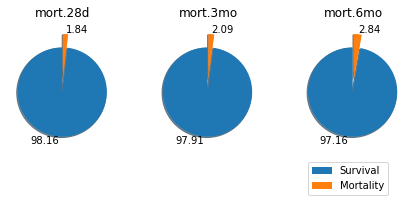

In [534]:
print('Percentage and Timing of Mortality among HF Cohort\n')
variables = ['mort.28d','mort.3mo','mort.6mo']
number =0
for var in variables:
    value = hf[var].value_counts().sort_index()
    percent = (value/2008) *100
    plt.subplot2grid((1,3), (0, number))
    plt.tight_layout()
    plt.pie(value, explode = (0.3, 0), labels = percent.round(2), 
            shadow = True, startangle = 90)
    plt.title(var)
    number +=1
plt.legend(labels = ('Survival', 'Mortality'), bbox_to_anchor = (0.85,-0.2),fontsize=10);

Findings:
- From an in-hospital mortality rate of <1%, it steadily increases up to almost 3% within 6 months of hospital admission
- Of those who were discharged alive, about 1.4% would succumb to death within 6 months from admission

In [535]:
hf_morttime = hf [ hf['mort.time.fr.adm'].notnull()]
hf_morttime.head()

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
43,"(69,79]",Male,1,NonEmergency,55,50-75,20,16-20,90,71 - 90,62,51-70,71.333333,71-90,36.0,35.0 - 36.0,65,61-70,23,21.1 - 23,15,0,Both,3,0,3,1,0,0,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,1,0,0,0,0,0,3,53.0,51-60,15.64,11-15,0.89,0.057,11.56,0.739,3.14,0.05,0.003,0.00,0.000,3.14,104,81-110,0.338,16.9,65.5,107,33.1,308,43,<50,12.4,16.4,0.039,2.07,38,17.2,33,2.10,11.25,11 - 15,2.43,155,151-200,83.1,0.540000,17,<25,285,251-300,15.52,11 - 15,771,1.75,18.3,135,131-135,5.34,92,2.09,0.44,1147,2096,2616,> 500,832,501-1000,7.0,26.700000,28,43.3,0.7,68,4262.0,27.9,23.6,51.5,119,25.8,71,2.17,1.18,0.53,0.76,Alive,4,<= 7,Unknown,1,1,1,11.0,0,0,0,NaN,0.0,NaN
74,"(69,79]",Female,1,Emergency,96,76-100,21,21-25,160,151 - 170,94,91-110,116.000000,111-130,36.1,36.1 - 37.0,43,<=50,18,17.1 - 19,15,0,Both,2,0,3,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,60.0,51-60,8.37,6-10,0.36,0.042,6.66,0.796,1.34,0.01,0.002,0.00,0.000,3.90,111,111-140,0.359,13.8,44.8,92,28.6,310,165,151-200,14.3,16.2,0.236,1.36,42,16.7,46,1.39,3.34,0.056 - 5,5.33,86,51-100,17.2,0.200000,65,51-75,76,51-100,7.36,5.1 -10,367,1.14,10.2,126,126-130,4.47,90,2.18,0.86,206,955,240,201-300,3526,3001-4000,4.3,18.700000,36,29.7,1.2,74,113.0,12.9,12.6,25.5,111,25.3,66,4.88,1.86,1.94,0.63,Alive,5,<= 7,Unknown,1,1,1,15.0,0,0,0,NaN,0.0,NaN
76,"(59,69]",Female,1,NonEmergency,116,101-125,19,16-20,110,91 - 110,75,71-90,86.666667,71-90,36.6,36.1 - 37.0,55,51-60,20,19.1 - 21,15,0,Both,3,0,1,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,1,0,0,0,1,0,2,52.0,51-60,5.56,<=5,0.30,0.054,4.47,0.804,0.77,0.01,0.002,0.01,0.002,4.44,133,111-140,0.428,16.8,57.4,96,29.9,310,107,101-150,11.3,16.1,0.121,1.52,47,17.4,39,1.57,12.59,11 - 15,1.77,75,51-100,6.8,0.090667,66,51-75,101,101-150,14.53,11 - 15,691,1.57,15.3,137,136-140,4.39,101,2.08,0.87,354,37,405,401-500,5000,4001-5000,7.1,15.200000,30,33.0,0.9,115,28.0,35.7,23.8,59.5,172,17.6,63,2.63,1.65,0.62,0.97,Alive,10,8- 14,Unknown,0,1,1,35.0,0,0,0,NaN,0.0,NaN
89,"(79,89]",Male,1,NonEmergency,88,76-100,18,16-20,120,111 - 130,70,51-70,86.666667,71-90,36.3,36.1 - 37.0,60,51-60,19,17.1 - 19,15,0,Both,3,0,2,0,0,0,0,0,0,TypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,73.0,>70,10.41,6-10,0.79,0.076,7.74,0.743,0.79,0.03,0.003,1.06,0.102,2.83,91,81-110,0.276,13.2,46.8,97,32.2,330,188,151-200,12.5,15.5,0.240,1.58,35,15.9,38,1.61,3.55,0.056 - 5,3.66,104,101-150,24.0,0.230000,20,<25,235,201-250,25.96,21 - 25,980,4.90,25.1,136,136-140,3.84,95,2.27,0.56,307,198,551,> 500,3999,3001-4000,13.0,10.300000,34,28.3,1.2,226,218.0,5.0,10.3,15.3,203,5.8,63,2.83,1.63,0.78,1.06,Dead,26,22- 28,Died,1,1,1,26.0,0,0,0,NaN,0.0,NaN
94,"(79,89]",Male,1,Emergency,155,>150,22,21-25,166,151 - 170,80,71-90,108.666667,91-110,36.0,35.0 - 36.0,55,51-60,19,17.1 - 19,15,0,Both,2,0,3,0,0,0,0,1,0,TypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,51.0,51-60,11.11,11-15,0.11,0.010,9.27,0.834,1.65,0.03,0.003,0.05,0.005,2.33,66,51-80,0.227,16.7,58.8,9

In [536]:
hf_morttime['mort.time.fr.adm'].agg(['count','mean','median',stat.mode,'min','max','std'])

count      44.000000
mean       29.522727
median      4.500000
mode        2.000000
min         1.000000
max       350.000000
std        72.452226
Name: mort.time.fr.adm, dtype: float64

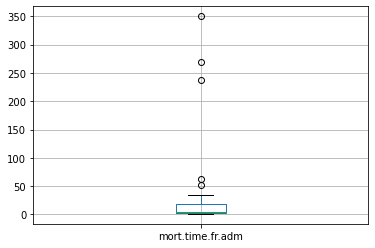

In [537]:
hf_morttime.boxplot('mort.time.fr.adm');

In [538]:
(hf['mort.6mo']==1).sum()
# 57 deaths at 6 mo, but only 44 have timing of deaths

57

In [539]:
hf[ hf['mort.6mo']==1]
# confirmed: all who were labeled as deaths in hospital outcome are also labeled as deaths at subsequent 'follow-up'
# but, recording of time of death for those who died within 3 months and 6 months are not available
# examination of the mortality data reveal the time basis for 28-day mortality, as timed from the time of admission (instead of discharge)

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
11,"(89,110]",Female,1,NonEmergency,87,76-100,18,16-20,140,131 - 150,68,51-70,92.000000,91-110,36.1,36.1 - 37.0,45,<=50,18,17.1 - 19,15,1,Both,3,0,3,0,0,1,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,3,44.0,41-50,5.470000,<=5,0.370000,0.068000,3.850000,0.703000,1.090000,0.020000,0.003000,0.140000,0.026000,2.440000,67,51-80,0.215000,15.70000,48.900000,88,27.700000,313,167,151-200,10.300000,16.500000,0.172000,1.09000,35,17.700000,77,1.100000,1.300,0.056 - 5,3.13000,89,51-100,15.8,0.170000,38,26-50,106,101-150,7.760000,5.1 -10,412,2.75,22.500000,137,136-140,3.940000,102,2.180000,0.817057,183,23,225,201-300,136,101-500,2.9,19.139841,36,27.000000,1.300000,134,25.0,5.0,5.400000,10.4,168,4.5,63,2.840000,1.440000,1.060000,0.790000,Alive,9,8- 14,Home,0,0,1,NaN,0,0,0,NaN,0.0,NaN
15,"(89,110]",Female,1,NonEmergency,96,76-100,19,16-20,179,>170,85,71-90,116.333333,111-130,36.0,35.0 - 36.0,40,<=50,17,15.1 - 17,15,0,Both,3,0,3,1,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,1,0,0,0,0,0,0,2,54.0,51-60,6.610000,6-10,0.390000,0.058000,5.330000,0.808000,0.810000,0.030000,0.004000,0.050000,0.008000,3.580000,72,51-80,0.257000,20.10000,50.900000,71,20.200000,282,273,251-300,9.100000,15.300000,0.247000,1.21000,32,17.200000,74,1.200000,0.890,0.056 - 5,2.83000,74,51-100,18.5,0.250000,80,76-100,59,51-100,8.200000,5.1 -10,233,1.35,22.900000,138,136-140,2.820000,100,2.330000,0.590000,135,38,228,201-300,1259,1001-2000,12.0,11.100000,38,26.200000,1.500000,65,95.0,2.8,5.200000,8.0,106,18.3,65,4.200000,1.930000,1.380000,0.820000,Alive,3,<= 7,Home,0,0,1,NaN,0,0,0,NaN,0.0,NaN
21,"(69,79]",Female,1,Emergency,123,101-125,20,16-20,160,151 - 170,90,71-90,113.333333,111-130,36.6,36.1 - 37.0,55,51-60,22,21.1 - 23,15,0,Both,3,0,3,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,54.0,51-60,13.060000,11-15,0.680000,0.052000,11.670000,0.893000,0.480000,0.100000,0.008000,0.130000,0.010000,3.000000,96,81-110,0.291000,14.00000,47.800000,97,32.100000,330,142,101-150,12.800000,16.400000,0.182000,1.01000,28,11.900000,91,1.010000,1.140,0.056 - 5,3.71000,82,51-100,19.4,0.240000,28,26-50,151,151-200,2.400000,<= 5,294,2.58,24.000000,141,141-145,3.750000,104,2.310000,0.850000,203,12,239,201-300,1001,1001-2000,2.9,19.139841,36,28.100000,1.300000,12,20.0,4.6,7.600000,12.2,73,4.5,65,2.870000,1.340000,1.000000,1.060000,Alive,11,8- 14,Home,0,0,1,NaN,0,0,0,NaN,0.0,NaN
24,"(59,69]",Male,1,NonEmergency,80,76-100,18,16-20,150,131 - 150,80,71-90,103.333333,91-110,36.3,36.1 - 37.0,62,61-70,21,19.1 - 21,15,0,Both,3,0,2,0,0,0,0,0,0,TypeII,NoSupport,OxygenTherapy,33,21-40,0,0,1,0,0,0,0,0,1,88.0,>70,8.110000,6-10,0.640000,0.079000,5.690000,0.701000,1.730000,0.010000,0.001000,0.040000,0.005000,4.520000,148,141-170,0.433000,13.90000,47.600000,95,32.700000,342,126,101-150,14.300000,16.600000,0.180000,1.16000,33,14.900000,77,1.160000,0.570,0.056 - 5,3.91000,67,51-100,13.0,0.190000,104,101-125,71,51-100,6.610000,5.1 -10,379,1.06,24.500000,136,136-140,3.450000,10

In [540]:
hf_alive[hf_alive['mort.time.fr.adm'] <=28]
# discharged alive but died soon after

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
43,"(69,79]",Male,1,NonEmergency,55,50-75,20,16-20,90,71 - 90,62,51-70,71.333333,71-90,36.0,35.0 - 36.0,65,61-70,23,21.1 - 23,15,0,Both,3,0,3,1,0,0,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,1,0,0,0,0,0,3,53.0,51-60,15.64,11-15,0.89,0.057,11.56,0.739,3.14,0.05,0.003,0.00,0.000,3.14,104,81-110,0.338,16.9,65.5,107,33.1,308,43,<50,12.4,16.4,0.039,2.07,38,17.2,33,2.10,11.25,11 - 15,2.43,155,151-200,83.1,0.54,17,<25,285,251-300,15.52,11 - 15,771,1.75,18.3,135,131-135,5.34,92,2.09,0.44,1147,2096,2616,> 500,832,501-1000,7.0,26.700000,28,43.3,0.7,68,4262.0,27.9,23.6,51.5,119,25.8,71,2.17,1.18,0.53,0.76,Alive,4,<= 7,Unknown,1,1,1,11.0,0,0,0,NaN,0.0,NaN
74,"(69,79]",Female,1,Emergency,96,76-100,21,21-25,160,151 - 170,94,91-110,116.000000,111-130,36.1,36.1 - 37.0,43,<=50,18,17.1 - 19,15,0,Both,2,0,3,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,60.0,51-60,8.37,6-10,0.36,0.042,6.66,0.796,1.34,0.01,0.002,0.00,0.000,3.90,111,111-140,0.359,13.8,44.8,92,28.6,310,165,151-200,14.3,16.2,0.236,1.36,42,16.7,46,1.39,3.34,0.056 - 5,5.33,86,51-100,17.2,0.20,65,51-75,76,51-100,7.36,5.1 -10,367,1.14,10.2,126,126-130,4.47,90,2.18,0.86,206,955,240,201-300,3526,3001-4000,4.3,18.700000,36,29.7,1.2,74,113.0,12.9,12.6,25.5,111,25.3,66,4.88,1.86,1.94,0.63,Alive,5,<= 7,Unknown,1,1,1,15.0,0,0,0,NaN,0.0,NaN
94,"(79,89]",Male,1,Emergency,155,>150,22,21-25,166,151 - 170,80,71-90,108.666667,91-110,36.0,35.0 - 36.0,55,51-60,19,17.1 - 19,15,0,Both,2,0,3,0,0,0,0,1,0,TypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,51.0,51-60,11.11,11-15,0.11,0.010,9.27,0.834,1.65,0.03,0.003,0.05,0.005,2.33,66,51-80,0.227,16.7,58.8,97,28.3,290,336,301-350,11.9,16.4,0.401,2.00,51,20.6,36,1.97,26.11,>20,3.63,271,251-300,66.7,0.25,16,<25,294,251-300,16.56,16 - 20,715,5.23,2.1,133,131-135,6.97,103,2.43,0.62,319,59,517,> 500,4731,4001-5000,2.9,19.149807,32,50.3,0.6,76,143.0,11.6,13.5,25.1,347,4.6,82,3.11,1.68,0.78,1.20,Alive,2,<= 7,Unknown,1,1,1,25.0,0,0,0,NaN,0.0,NaN
140,"(69,79]",Female,1,Emergency,121,101-125,23,21-25,168,151 - 170,101,91-110,123.333333,111-130,38.1,38.1 - 39.0,50,<=50,23,21.1 - 23,15,1,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,1,52.0,51-60,11.39,11-15,0.40,0.035,9.56,0.840,1.21,0.05,0.004,0.17,0.015,4.45,130,111-140,0.416,14.2,46.7,93,29.2,313,240,201-250,12.8,16.7,0.307,1.28,26,17.1,67,1.27,1.14,0.056 - 5,4.51,58,51-100,14.3,0.25,95,76-100,55,51-100,8.84,5.1 -10,459,1.28,27.6,140,136-140,5.76,101,2.54,0.89,177,21,200,101-200,1122,1001-2000,2.9,19.139841,47,32.8,1.4,65,19.0,4.8,7.3,12.1,76,4.5,79,5.50,3.27,1.34,1.13,Alive,1,<= 7,Unknown,1,1,1,3.0,0,0,0,NaN,0.0,NaN
398,"(79,89]",Male,1,NonEmergency,100,76-100,19,16-20,106,91 - 110,62,51-70,76.666667,71-90,36.5,36.1 - 37.0,42,<=50,17,15.1 - 17,15,1,Both,3,0,2,1,0,0,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,3,58.0,51-60,4.54,<=5,0.66,0.145,2.95,0.650,0.91,0.00,0.000,0.02,0.004,4.76,148,141-170,0.446,13.1,45.0,93,31.0,331,86,51-10

In [541]:
# bin only the valid times, ie first 4 weeks
var= hf_morttime['mort.time.fr.adm']
labels = ['<= 1st week','2nd week','3rd week','4th week']
bins = [0,7,14,21,28]
loc = (hf.columns.get_loc('mort.time.fr.adm')) + 1
newcolumn = 'mort.time_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Time of Mortality Distribution among Heart Failure cohort


,Frequency,% of HF cohort,% of Mortalities
<= 1st week,25,1.25,43.86
2nd week,5,0.25,8.77
3rd week,4,0.20,7.02
4th week,3,0.15,5.26


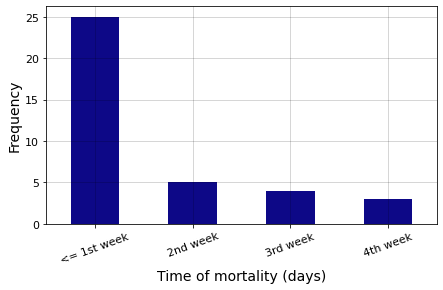

In [542]:
val = hf['mort.time_group'].value_counts().sort_index()
perc = val/ 2008 * 100
perc2 = val/57 * 100
feature = pd.concat( [val, perc, perc2], axis = 1, keys = ['Frequency', '% of HF cohort','% of Mortalities']).round(2)
print('Time of Mortality','Distribution among Heart Failure cohort')
display(feature)
val.plot(kind = 'bar', rot=20, figsize = (7,4), fontsize =11, cmap='plasma')
plt.xlabel('Time of mortality (days)', size =14)
plt.ylabel('Frequency', size =14)
plt.grid(color = 'black', alpha = 0.2);

Findings:
- There were 57 deaths recorded by 6 months.  Of these, 44 recorded timing of deaths in the cohort (mainly those dying within the first month)
- Because of the inavailability of the timing of deaths for those who died beyond the first month, caution should be taken in interpreting the time of death data
- The median time of death was 4.5 days after admission.  The mean was distorted by outliers.  The range was 1-350 days after admission.
- Almost half of the deaths (44%) occured within the 1st week of admission, accounting for 1.25% cohort mortality
- There were occasions of patients being discharged alive from the hospital, but dying soon after.  This could reflect cultural/personal choices regarding end-of-life decisions.

In [543]:
hf[['read.28d','read.3mo','read.6mo']].isnull().sum()

read.28d    0
read.3mo    0
read.6mo    0
dtype: int64

In [544]:
variables = ['read.28d','read.3mo','read.6mo']
for variable in variables:
    print(variable)
    table_alive2(variable, 'Readmission') 

read.28d
Readmission Distribution among Heart Failure cohort


,% among whole cohort,% among Alive at discharge
0,93.03,93.02
1,6.97,6.98


read.3mo
Readmission Distribution among Heart Failure cohort


,% among whole cohort,% among Alive at discharge
0,75.2,74.87
1,24.8,25.13


read.6mo
Readmission Distribution among Heart Failure cohort


,% among whole cohort,% among Alive at discharge
0,61.5,60.58
1,38.5,39.42


Findings:
- The rate of readmission increases rapidly from 7% during the 1st month, to almost 40% by the 6th month

In [545]:
hf_read= hf [ hf['read.time.fr.adm'].notnull()]
hf_read.head(20)

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,mort.time_group,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
3,"(69,79]",Male,1,Emergency,73,50-75,19,16-20,110,91 - 110,74,71-90,86.000000,71-90,36.0,35.0 - 36.0,65,61-70,22,21.1 - 23,15,0,Both,3,0,2,0,0,0,1,0,1,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,52.0,51-60,2.18,<=5,0.19,0.087,1.22,0.559,0.71,0.00,0.000,0.06,0.028,2.71,94,81-110,0.277,18.8,69.0,102,34.7,339,35,<50,12.400000,19.400000,0.032000,1.37,38,18.3,60,1.36,1.39,0.056 - 5,2.63,89,51-100,15.8,0.170000,58,51-75,104,101-150,8.16,5.1 -10,635,2.32,21.1,136,136-140,3.76,101,2.35,0.817057,183,9,225,201-300,1071,1001-2000,11.2,19.400000,40,27.000000,1.500000,134,25.0,25.4,26.200000,51.6,191,9.4,67,2.920000,1.310000,0.980000,0.920000,Alive,11,8- 14,Home,0,0,0,NaN,NaN,1,1,1,19.0,1.0,19.0
5,"(79,89]",Female,1,NonEmergency,110,101-125,18,16-20,96,91 - 110,64,51-70,74.666667,71-90,36.0,35.0 - 36.0,45,<=50,18,17.1 - 19,15,0,Both,3,0,1,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,52.0,51-60,10.82,6-10,0.71,0.066,9.45,0.873,0.60,0.03,0.003,0.03,0.003,3.44,100,81-110,0.293,14.6,44.3,85,29.1,342,189,151-200,10.000000,16.200000,0.188000,1.17,36,14.6,76,1.17,1.46,0.056 - 5,5.31,54,51-100,19.5,0.360000,25,<25,163,151-200,26.36,> 25,717,4.78,22.1,120,<= 125,5.44,82,2.31,0.840000,197,23,235,201-300,1648,1001-2000,2.1,17.000000,36,22.400000,1.600000,37,20.0,3.9,5.500000,9.4,120,2.1,59,4.090000,2.470000,0.730000,1.760000,Alive,6,<= 7,Home,0,0,0,NaN,NaN,1,1,1,15.0,1.0,15.0
7,"(69,79]",Female,1,Emergency,94,76-100,18,16-20,112,111 - 130,60,51-70,77.333333,71-90,36.0,35.0 - 36.0,50,<=50,20,19.1 - 21,15,0,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,52.0,51-60,7.33,6-10,0.60,0.082,5.27,0.719,1.35,0.02,0.003,0.09,0.012,3.92,132,111-140,0.399,14.3,52.5,101,33.8,332,116,101-150,11.900000,16.300000,0.138000,1.29,34,17.1,55,1.33,0.66,0.056 - 5,2.51,117,101-150,25.3,0.220000,54,51-75,88,51-100,8.37,5.1 -10,544,1.66,27.7,137,136-140,3.43,99,2.15,0.650000,212,20,327,301-400,801,501-1000,2.9,19.139841,36,28.150556,1.360364,57,27.0,6.4,13.563498,18.3,79,4.5,64,3.687416,1.833608,1.101582,1.158270,Alive,27,22- 28,HealthcareFacility,0,0,0,NaN,NaN,0,1,1,58.0,1.0,58.0
10,"(49,59]",Female,1,NonEmergency,60,50-75,18,16-20,126,111 - 130,64,51-70,84.666667,71-90,36.3,36.1 - 37.0,35,<=50,14,<15,15,0,Both,3,1,2,1,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,52.0,51-60,5.14,<=5,0.56,0.110,4.13,0.803,0.41,0.01,0.002,0.03,0.005,3.58,113,111-140,0.354,15.9,56.2,98,31.5,319,125,101-150,12.500000,16.000000,0.156000,1.25,32,17.8,69,1.25,0.70,0.056 - 5,3.84,53,51-100,21.8,0.410000,38,26-50,134,101-150,28.92,> 25,827,3.68,21.5,129,126-130,5.24,91,2.45,0.820000,199,17,243,201-300,691,501-1000,2.9,19.139841,46,32.400000,1.400000,50,33.0,16.6,24.100000,40.7,125,4.5,79,3.400000,1.460000,1.240000,0.850000,Alive,9,8- 14,Unknown,0,0,0,NaN,NaN,0,1,1,69.0,1.0,69.0
16,"(79,89]",Male,1,Emergency,80,76-100,18,16-20,172,>170,90,71-90,117.333333,111-130,36.1,36.1 - 37.0,60,51-60,23,

In [546]:
hf_read['read.time.fr.adm'].agg(['count','mean','median',stat.mode,'min','max','std'])

count      901.000000
mean       126.711432
median      83.000000
mode        32.000000
min          1.000000
max       2280.000000
std        145.025343
Name: read.time.fr.adm, dtype: float64

In [547]:
var= hf['read.time.fr.adm']
labels = ['1st week', '2nd week','3rd week','4th week','3rd month','6th month','9th month','1st year','> 1 year']
bins = [0,7,14,21,28,90,180,270,365, 2280]
loc = (hf.columns.get_loc('read.time.fr.adm')) + 1
newcolumn = 'read.time_group'
hf.insert(loc=loc, column = newcolumn,
          value= (pd.cut(x = var, bins =bins, labels = labels, include_lowest =True)))

Readmission Time from Inital Admission Distribution among Heart Failure cohort


,Frequency,%
1st week,11,0.55
2nd week,19,0.95
3rd week,60,2.99
4th week,50,2.49
3rd month,358,17.83
6th month,204,10.16
9th month,103,5.13
1st year,48,2.39
> 1 year,48,2.39


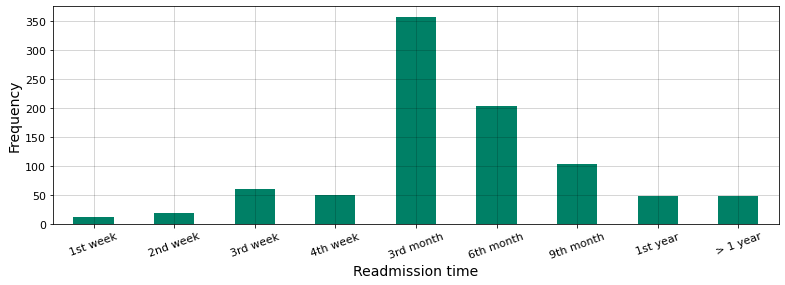

In [548]:
table_barplot1('read.time_group','Readmission Time from Inital Admission', 'Readmission time')

Findings:
- The median time of readmission was 83 days.  The mean was distorted by outliers.
- Readmissions most commonly occur (28% of cohort) within 3-6 months after the initial admission.

In [549]:
hf['ED.6mo'] = hf['ED.6mo'].astype(int)

Return to Emergency Department within 6 months Distribution among Heart Failure cohort


,Frequency,%
0,1233,61.4
1,775,38.6


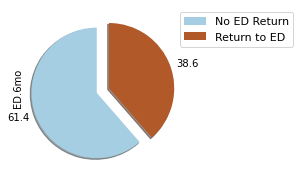

In [550]:
table_pieplot2('ED.6mo', 'Return to Emergency Department within 6 months','No ED Return','Return to ED')

In [551]:
hf['read.6mo'].value_counts()

0    1235
1     773
Name: read.6mo, dtype: int64

In [552]:
aa = hf [ (hf['read.6mo']==1) & (hf['ED.6mo']==1)]
aa['age'].count()

767

In [553]:
print('percent ED readmission =', 767/773 *100)

percent ED readmission = 99.22380336351875


Findings:
- More than a quarter of the cohort (39%) needed to return to the ED within 6 months of initial admission
- Almost all of the readmissions were through the ED

In [554]:
# ED time 6 mo compared to Readmission time: Readmission time provided better data, drop EDtime6mo
hf.drop(columns = 'ED.time.6mo', axis =1, inplace=True)

In [555]:
hf.head()

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,mort.time_group,read.28d,read.3mo,read.6mo,read.time.fr.adm,read.time_group,ED.6mo
0,"(69,79]",Male,1,NonEmergency,87,76-100,19,16-20,102,91 - 110,64,51-70,76.666667,71-90,36.7,36.1 - 37.0,50,<=50,18,17.1 - 19,15,0,Both,3,0,3,1,0,0,0,0,1,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,52.0,51-60,9.43,6-10,0.80,0.085,7.05,0.746,1.51,0.05,0.006,0.02,0.002,4.09,131,111-140,0.387,15.0,50.3,94,32.0,338,102,101-150,14.0,16.6,0.142,1.39,33,17.0,60,1.37,1.19,0.056 - 5,3.84,43,<=50,9.6,0.22,58,51-75,108,101-150,12.55,11 - 15,685,1.32,21.6,134,131-135,5.59,101,2.28,0.630000,185,65,294,201-300,1500,1001-2000,3.5,20.5,38,23.8,1.6,83,81.0,6.9,11.4,18.3,61,4.9,61,3.46,1.90,0.84,2.69,Alive,11,8- 14,Home,0,0,0,NaN,NaN,0,0,0,NaN,NaN,0
1,"(69,79]",Female,1,NonEmergency,95,76-100,18,16-20,150,131 - 150,70,51-70,96.666667,91-110,36.8,36.1 - 37.0,51,51-60,19,17.1 - 19,15,0,Both,3,0,1,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,40.0,31-40,5.32,<=5,0.35,0.066,3.73,0.702,1.18,0.01,0.002,0.05,0.009,3.93,114,111-140,0.349,13.0,40.7,88,28.9,326,123,101-150,11.3,16.1,0.139,1.16,35,18.4,65,1.18,1.06,0.056 - 5,2.62,107,101-150,17.2,0.16,85,76-100,62,51-100,4.29,<= 5,170,1.25,26.5,144,141-145,3.62,105,2.28,0.840000,170,19,203,201-300,361,101-500,2.2,21.9,40,25.4,1.6,17,21.0,5.2,13.1,18.3,69,2.4,66,3.15,1.26,1.30,0.84,Alive,8,8- 14,Home,0,0,0,NaN,NaN,0,0,0,NaN,NaN,0
2,"(59,69]",Male,2,NonEmergency,98,76-100,18,16-20,102,91 - 110,67,51-70,78.666667,71-90,36.5,36.1 - 37.0,70,61-70,24,23.1 - 25,15,0,Both,2,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,46.0,41-50,13.01,11-15,0.67,0.051,11.54,0.887,0.75,0.03,0.002,0.02,0.002,4.43,144,141-170,0.427,12.9,44.5,96,32.6,339,169,151-200,12.0,16.5,0.203,1.10,36,14.9,85,1.09,0.83,0.056 - 5,5.74,38,<=50,14.6,0.38,31,26-50,185,151-200,15.99,11 - 15,567,2.43,21.6,142,141-145,4.15,107,2.56,0.770000,105,10,137,101-200,293,101-500,2.3,12.3,33,27.7,1.2,27,9.0,4.4,7.5,11.9,76,2.4,60,3.79,2.13,0.94,1.53,Alive,5,<= 7,Home,0,0,0,NaN,NaN,0,0,0,NaN,NaN,0
3,"(69,79]",Male,1,Emergency,73,50-75,19,16-20,110,91 - 110,74,71-90,86.000000,71-90,36.0,35.0 - 36.0,65,61-70,22,21.1 - 23,15,0,Both,3,0,2,0,0,0,1,0,1,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,52.0,51-60,2.18,<=5,0.19,0.087,1.22,0.559,0.71,0.00,0.000,0.06,0.028,2.71,94,81-110,0.277,18.8,69.0,102,34.7,339,35,<50,12.4,19.4,0.032,1.37,38,18.3,60,1.36,1.39,0.056 - 5,2.63,89,51-100,15.8,0.17,58,51-75,104,101-150,8.16,5.1 -10,635,2.32,21.1,136,136-140,3.76,101,2.35,0.817057,183,9,225,201-300,1071,1001-2000,11.2,19.4,40,27.0,1.5,134,25.0,25.4,26.2,51.6,191,9.4,67,2.92,1.31,0.98,0.92,Alive,11,8- 14,Home,0,0,0,NaN,NaN,1,1,1,19.0,3rd week,1
4,"(69,79]",Female,1,NonEmergency,88,76-100,19,16-20,134,131 - 150,62,51-70,86.000000,71-90,35.0,35.0 - 36.0,76,71-80,31,>27,15,0,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,64.0,61-70,6.14,6-10,0.53,0.086,4.28,0.697,1.27,0.01,0.002,0.05,0.008,4.20,120,111-140,0.378,14.7,47.7,90,28.6,317,104,101-150,12

In [556]:
# saving univariate analysis generated DF for further analyses
hf.to_csv('~/Desktop/hf2.csv')

#### II. C.  Univariate Analyses:  Summary of Findings

#### Summary of Univariate Findings: Clinical Variables

- Majority of the patients (67%) are between ages 69-89 

- Slightly more than half of the patients (58%) were female

- All of the patients has been admitted at least once prior to present admission

- Almost half of the patients (48%) needed emergent care during present hospital admission

- The mean HR and RR were normal.  The mean MAP was high normal.  The mean weight and BMI were within acceptable range.  Majoriity were received with consciousness level GCS 15.


- Details:

- The mean HR was normal at 85 +/- 22 bpm (range 0-198)

- The mean RR was high normal at 19 +/- 2 (range 0-36 bpm)

- The mean SBP was high normal at 131 +/- 24 (range 0-252 mmHg)

- The mean DBP was normal at 74 +/- 14 (range 0-146 mmHg)

- The mean MAP was high normal at 95 +/- 16 (range 0-181 mmHg)

- The mean temp was low-normal at 36.4 +/- 0.4 (range 35-42 C)

- The mean weight was 53 +/- 11 (range 30 -115 kg)

- The mean BMI was 21 +/- 4 (range 13-39)

- The majority (97%) were received with GCS 15


#### Summary Findings: Comorbidities

- Most of the present admissions (93%) had a previous history of CHF

- Majority of the patients (74%) had both left and right heart failures

- More than half of the patients (52%) were of NYHA III classification
- Almost a third (31%) were in NYHA IV

- There were no apparent dominant comorbitiy.

- Majority of the pateints (98%) did not need ventilatory support, however, 95% needed low-dose Oxygen supplementation


- Details:

- Only a minority (7%) had a previous MI

- More than half of the patients (51%) were in Killip class II

- Only a quarter (23%) had DM

- Almost a quarter of the patients (24%) had CKD

- The mean oxygen supplementation was at FiO2 33 +/- 5 (range 21- 100%)

- PVD, CVD and Non-cardiovascular comorbidities were infrequent, with a low CCI score of 1-3


#### Summary of Findings:  Echo and CBC Results

- The mean LVEDD was normal at 53 +/- 9 (range 22-88 mm)

- Majority of the patients had normal CBC parameters, apart from:
- Low mean eosinophil ratio of 0.02 (ref: 0.5-5)
- Almost a quarter (23%) had low to low-normal platelet counts (51-100)


#### Summary of Findings:  Anticoagulation and Fibrinolysis Profile Labs

- The mean INR, APTT, TT and fibrinogen were within normal values

- The mean CK and CK isoenzyme levels were normal

- The D-dimer and CK-isoenzyme:CK ratio were elevated


- Details:

- The median and mode values of D-dimer values (1.17 and 1.14 mg/L, respectively) (ref: 0-0.55 mg/L)

- The mean CK isoenzyme to CK ratio 0.21 +/- 0.14 (range 0.01 - 1) (ref: 0- 0.05)


#### Summary of Findings: Renal Function Labs

- The mean Glomerular Filtrate Rate was low

- The median and mode creatinine levels were normal 

- The mean urea, uric acid and cystatin levels were mildly elevated


- Details:

- Mean GFR 68 +/- 36 (range 3 - 281 mL/min/1.73 m2)

-  The mean urea level was slightly elevated at 10 +/- 6 (range 2-46) (ref: 1.7 - 8.3 mmol/L)

- The mean uric acid level was mildly elevated at 482 +/- 169 (range 62-1409) (ref: 150-440 umol/L)

- The mean cystatin level was mildly elevated at 1.8 +/- 1 (range 0.2 - 10) (ref: 0.51 - 0.98 mg/L)


#### Summary of Findings:  Blood Chemistry

- BNP levels were elevated


- The following blood chemistries had normal values:


- CO2 binding capacity  
- serum Na, K, Cl and Ca  
- HBD, LDH, HBD : LDH ratio 
- nucleotidase and fucosidase
- albumin, globulin and white globulin ratio
- AST, GTP and ALT
- TB, DB, IB, AP, bile, TP
- Cholesterol, LDL, HDL and triglyceride 


- Details:
- The mean BNP level distribution was irregular (mean 1271, median 744, mode 5000 pg/ml)


#### Summary of Findings:  Clinical Outcome

###### In-hospital Outcome and Discharge Disposition

- In-hospital mortality rate was 0.55%

- Majority of the patients (89%) stayed in the hospital for 1-2 weeks
- Of those who were discharged alive, the majority (69%) went home.
- Almost a quarter (22%) went to live in a healthcare facility
- 5% were discharged against advice

###### 1st month mortality

- Of those who died within the first month, almost half of the deaths (44%) occured within the 1st week of admission, accounting for 1.25% cohort mortality.  Some of these early deaths occured soon after being discharged alive, which could be accounted for by personal and cultural choices regarding end-of-life measures.

- It is possible that the mortality rates are higher.  A good number of patients were discharged against advice, and half of these did not have available data on the type and timing of outcome.  

- The best available death data are on those who died within the first 28 days of admission.  The 28-day mortality rate was 1.8%.

###### 6th month mortality

- Of those who were discharged alive, almost 1.4% would succumb to death within 6 months of initial admission.

- Mortality steadily increased to 3% after 6 months from initial admission.

###### Readmission

- The rate of readmission increases rapidly from 7% during the 1st month, to almost 40% by the 6th month.  The median time was 83 days from initial admission.

- More than a quarter of the cohort (39%) needed to return to the ED within 6 months of initial admission.

- Almost all of the readmissions were through the ED